In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset_1=pd.read_excel("dataset_1.csv")

In [3]:
dataset_1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,1,0,False,6,1,0.24
1,2,2011-01-01,1,0,1,1,False,6,1,0.22
2,3,2011-01-01,1,0,1,2,False,6,1,0.22
3,4,2011-01-01,1,0,1,3,False,6,1,0.24
4,5,2011-01-01,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,2011-01-28,1,0,1,11,False,5,3,0.18
606,607,2011-01-28,1,0,1,12,False,5,3,0.18
607,608,2011-01-28,1,0,1,13,False,5,3,0.18
608,609,2011-01-28,1,0,1,14,False,5,3,0.22


In [4]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     610 non-null    int64         
 1   dteday      610 non-null    datetime64[ns]
 2   season      610 non-null    int64         
 3   yr          610 non-null    int64         
 4   mnth        610 non-null    int64         
 5   hr          610 non-null    int64         
 6   holiday     610 non-null    bool          
 7   weekday     610 non-null    int64         
 8   weathersit  610 non-null    int64         
 9   temp        610 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 43.6 KB


In [5]:
dataset_1.describe().T

,count,mean,min,25%,50%,75%,max,std
instant,610.0,305.5,1.0,153.25,305.5,457.75,610.0,176.236111
dteday,610,2011-01-13 19:47:24.590163968,2011-01-01 00:00:00,2011-01-07 00:00:00,2011-01-14 00:00:00,2011-01-21 00:00:00,2011-01-28 00:00:00,NaN
season,610.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
yr,610.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mnth,610.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
hr,610.0,11.795082,0.0,6.0,12.0,18.0,23.0,6.852107
weekday,610.0,2.977049,0.0,1.0,3.0,5.0,6.0,2.054943
weathersit,610.0,1.477049,1.0,1.0,1.0,2.0,4.0,0.643496
temp,610.0,0.196885,0.02,0.16,0.2,0.235,0.46,0.081304


In [6]:
dataset_1.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                 bool
weekday                int64
weathersit             int64
temp                 float64
dtype: object

In [7]:
dataset_1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,1,0,False,6,1,0.24
1,2,2011-01-01,1,0,1,1,False,6,1,0.22
2,3,2011-01-01,1,0,1,2,False,6,1,0.22
3,4,2011-01-01,1,0,1,3,False,6,1,0.24
4,5,2011-01-01,1,0,1,4,False,6,1,0.24


In [8]:
# Check for missing values
dataset_1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64

In [9]:
# Handle missing values
dataset_1.fillna(dataset_1.median, inplace=True) 

In [10]:
dataset_1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,1,0,False,6,1,0.24
1,2,2011-01-01,1,0,1,1,False,6,1,0.22
2,3,2011-01-01,1,0,1,2,False,6,1,0.22
3,4,2011-01-01,1,0,1,3,False,6,1,0.24
4,5,2011-01-01,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,2011-01-28,1,0,1,11,False,5,3,0.18
606,607,2011-01-28,1,0,1,12,False,5,3,0.18
607,608,2011-01-28,1,0,1,13,False,5,3,0.18
608,609,2011-01-28,1,0,1,14,False,5,3,0.22


In [11]:
# Drop unnecessary columns
dataset_1.drop(columns=['yr', 'mnth',"season"], errors='ignore', inplace=True)

In [12]:
dataset_1

,instant,dteday,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,0,False,6,1,0.24
1,2,2011-01-01,1,False,6,1,0.22
2,3,2011-01-01,2,False,6,1,0.22
3,4,2011-01-01,3,False,6,1,0.24
4,5,2011-01-01,4,False,6,1,0.24
...,...,...,...,...,...,...,...
605,606,2011-01-28,11,False,5,3,0.18
606,607,2011-01-28,12,False,5,3,0.18
607,608,2011-01-28,13,False,5,3,0.18
608,609,2011-01-28,14,False,5,3,0.22


In [13]:
dataset_1.drop_duplicates(inplace=True)

In [14]:
dataset_1

,instant,dteday,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,0,False,6,1,0.24
1,2,2011-01-01,1,False,6,1,0.22
2,3,2011-01-01,2,False,6,1,0.22
3,4,2011-01-01,3,False,6,1,0.24
4,5,2011-01-01,4,False,6,1,0.24
...,...,...,...,...,...,...,...
605,606,2011-01-28,11,False,5,3,0.18
606,607,2011-01-28,12,False,5,3,0.18
607,608,2011-01-28,13,False,5,3,0.18
608,609,2011-01-28,14,False,5,3,0.22


In [15]:
#print("\nData After Cleaning:")
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     610 non-null    int64         
 1   dteday      610 non-null    datetime64[ns]
 2   hr          610 non-null    int64         
 3   holiday     610 non-null    bool          
 4   weekday     610 non-null    int64         
 5   weathersit  610 non-null    int64         
 6   temp        610 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 29.3 KB


In [16]:
missing_values = dataset_1.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant       0
dteday        0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64


In [17]:
dataset_1.fillna(dataset_1.median(numeric_only=True), inplace=True)

In [18]:
dataset_1

,instant,dteday,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,0,False,6,1,0.24
1,2,2011-01-01,1,False,6,1,0.22
2,3,2011-01-01,2,False,6,1,0.22
3,4,2011-01-01,3,False,6,1,0.24
4,5,2011-01-01,4,False,6,1,0.24
...,...,...,...,...,...,...,...
605,606,2011-01-28,11,False,5,3,0.18
606,607,2011-01-28,12,False,5,3,0.18
607,608,2011-01-28,13,False,5,3,0.18
608,609,2011-01-28,14,False,5,3,0.22


In [19]:
dataset_1['dteday'] = pd.to_datetime(dataset_1['dteday'], format='%d-%m-%Y')
dataset_1['yr']=dataset_1['dteday'].dt.year
dataset_1['mnth']=dataset_1['dteday'].dt.month
dataset_1['dteday']=dataset_1['dteday'].dt.day

In [20]:
dataset_1

,instant,dteday,hr,holiday,weekday,weathersit,temp,yr,mnth
0,1,1,0,False,6,1,0.24,2011,1
1,2,1,1,False,6,1,0.22,2011,1
2,3,1,2,False,6,1,0.22,2011,1
3,4,1,3,False,6,1,0.24,2011,1
4,5,1,4,False,6,1,0.24,2011,1
...,...,...,...,...,...,...,...,...,...
605,606,28,11,False,5,3,0.18,2011,1
606,607,28,12,False,5,3,0.18,2011,1
607,608,28,13,False,5,3,0.18,2011,1
608,609,28,14,False,5,3,0.22,2011,1


In [21]:
# Compute correlation
correlation_matrix = dataset_1.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             instant    dteday        hr   holiday   weekday  weathersit  \
instant     1.000000  0.998949  0.025355  0.090792  0.015448    0.162506   
dteday      0.998949  1.000000 -0.011974  0.082414  0.022275    0.166450   
hr          0.025355 -0.011974  1.000000 -0.008722 -0.021792   -0.056370   
holiday     0.090792  0.082414 -0.008722  1.000000 -0.194864    0.217058   
weekday     0.015448  0.022275 -0.021792 -0.194864  1.000000    0.065414   
weathersit  0.162506  0.166450 -0.056370  0.217058  0.065414    1.000000   
temp       -0.314224 -0.315769  0.165148 -0.052444  0.040457    0.224919   
yr               NaN       NaN       NaN       NaN       NaN         NaN   
mnth             NaN       NaN       NaN       NaN       NaN         NaN   

                temp  yr  mnth  
instant    -0.314224 NaN   NaN  
dteday     -0.315769 NaN   NaN  
hr          0.165148 NaN   NaN  
holiday    -0.052444 NaN   NaN  
weekday     0.040457 NaN   NaN  
weathersit  0.224919

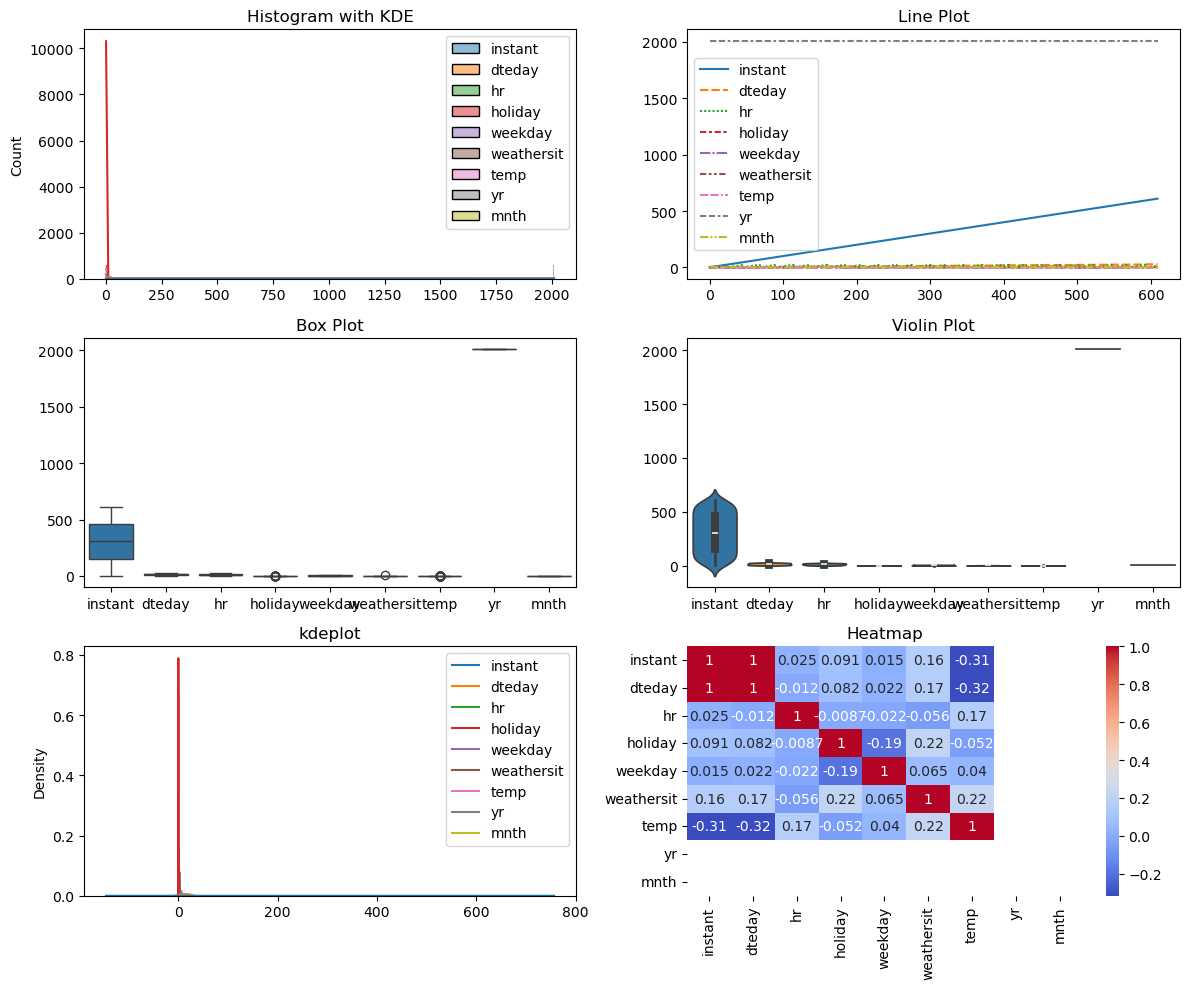

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 2x2 grid of plots

# Histogram
sns.histplot(dataset_1, kde=True, ax=axes[0, 0])  # First subplot (top-left)
axes[0, 0].set_title('Histogram with KDE')

# Line plot
sns.lineplot(dataset_1,ax=axes[0, 1])  # First row, second column
axes[0, 1].set_title('Line Plot')

# Box plot
sns.boxplot(dataset_1,ax=axes[1, 0])  # Second row, first column
axes[1, 0].set_title('Box Plot')

# Violin plot
sns.violinplot(dataset_1,ax=axes[1, 1])  # Second row, second column
axes[1, 1].set_title('Violin Plot')

#kdeplot
sns.kdeplot(dataset_1,ax=axes[2,0])
axes[2,0].set_title('kdeplot')
#heatmap
sns.heatmap(dataset_1.corr(), annot=True, cmap='coolwarm', ax=axes[2, 1])  # Fourth row, right
axes[2, 1].set_title('Heatmap')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
dataset_2=pd.read_excel("dataset_2.csv")

In [24]:
dataset_2

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [25]:
dataset_2.dtypes

Unnamed: 0      int64
instant         int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [26]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  610 non-null    int64  
 1   instant     610 non-null    int64  
 2   atemp       599 non-null    float64
 3   hum         610 non-null    float64
 4   windspeed   610 non-null    float64
 5   casual      610 non-null    int64  
 6   registered  610 non-null    int64  
 7   cnt         610 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 38.3 KB


In [27]:
dataset_2.dtypes

Unnamed: 0      int64
instant         int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [28]:
dataset_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,610.0,304.500000,176.236111,0.00,152.2500,304.500,456.7500,609.0000
instant,610.0,305.500000,176.236111,1.00,153.2500,305.500,457.7500,610.0000
atemp,599.0,0.199935,0.078836,0.00,0.1515,0.197,0.2424,0.4545
hum,610.0,0.562475,0.175440,0.21,0.4325,0.520,0.6900,1.0000
windspeed,610.0,0.204851,0.121806,0.00,0.1045,0.194,0.2836,0.5821
casual,610.0,4.501639,6.319945,0.00,0.0000,2.000,6.0000,47.0000
registered,610.0,51.068852,47.021204,0.00,14.0000,43.000,70.0000,247.0000
cnt,610.0,55.570492,49.316802,1.00,16.0000,47.000,79.7500,249.0000


In [29]:
dataset_2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


In [30]:
# Check for missing values
dataset_2.isnull().sum()

Unnamed: 0     0
instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [31]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  610 non-null    int64  
 1   instant     610 non-null    int64  
 2   atemp       599 non-null    float64
 3   hum         610 non-null    float64
 4   windspeed   610 non-null    float64
 5   casual      610 non-null    int64  
 6   registered  610 non-null    int64  
 7   cnt         610 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 38.3 KB


In [32]:
# Drop unnecessary columns
dataset_2.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

In [33]:
dataset_2

,instant,atemp,hum,windspeed,casual,registered,cnt
0,1,0.2879,0.81,0.0000,3,13,16
1,2,0.2727,0.80,0.0000,8,32,40
2,3,0.2727,0.80,0.0000,5,27,32
3,4,0.2879,0.75,0.0000,3,10,13
4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
605,606,0.2121,0.93,0.1045,0,30,30
606,607,0.2121,0.93,0.1045,1,28,29
607,608,0.2121,0.93,0.1045,0,31,31
608,609,0.2727,0.80,0.0000,2,36,38


In [34]:
#print("\nData After Cleaning:")
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   atemp       599 non-null    float64
 2   hum         610 non-null    float64
 3   windspeed   610 non-null    float64
 4   casual      610 non-null    int64  
 5   registered  610 non-null    int64  
 6   cnt         610 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 33.5 KB


In [35]:
dataset_2.count()

instant       610
atemp         599
hum           610
windspeed     610
casual        610
registered    610
cnt           610
dtype: int64

In [36]:
missing_values = dataset_2.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64


In [37]:
#filling the null values using .fillna()
dataset_2["atemp"]=dataset_2["atemp"].fillna(dataset_2["atemp"].mean())

In [38]:
dataset_2.isnull().sum()

instant       0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

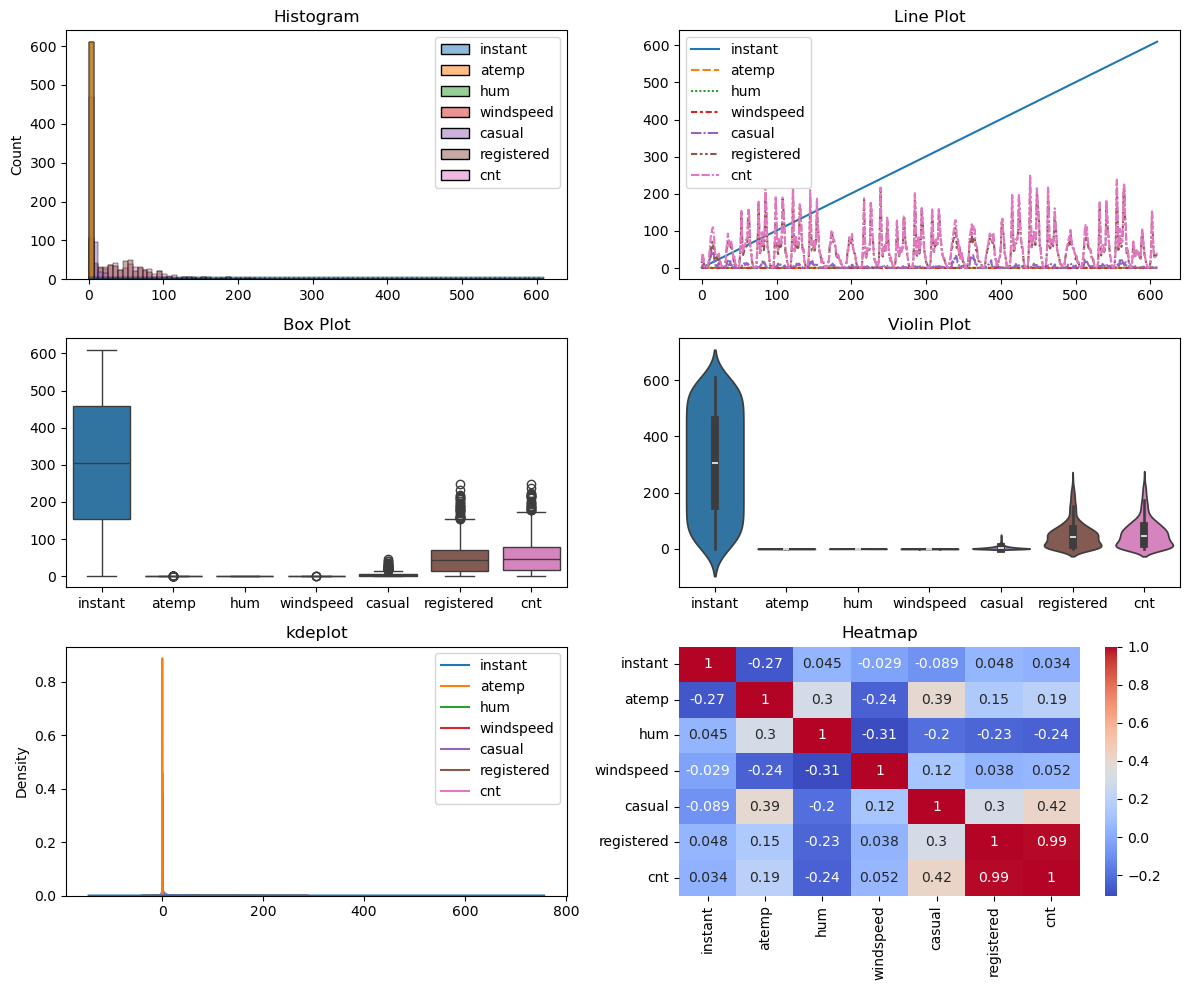

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3x2 grid of plots

# Histogram
sns.histplot(dataset_2,ax=axes[0, 0])  # First subplot (top-left)
axes[0, 0].set_title('Histogram')

# Line plot
sns.lineplot(dataset_2,ax=axes[0, 1])  # First row, second column
axes[0, 1].set_title('Line Plot')

# Box plot
sns.boxplot(dataset_2,ax=axes[1, 0])  # Second row, first column
axes[1, 0].set_title('Box Plot')

# Violin plot
sns.violinplot(dataset_2,ax=axes[1, 1])  # Second row, second column
axes[1, 1].set_title('Violin Plot')

#kdeplot
sns.kdeplot(dataset_2,ax=axes[2,0])
axes[2,0].set_title('kdeplot')

#heatmap
sns.heatmap(dataset_2.corr(), annot=True, cmap='coolwarm', ax=axes[2, 1])  # Fourth row, right
axes[2, 1].set_title('Heatmap')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
df=pd.merge(dataset_1,dataset_2, on= "instant", how= "inner")

In [41]:
df

,instant,dteday,hr,holiday,weekday,weathersit,temp,yr,mnth,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,False,6,1,0.24,2011,1,0.2879,0.81,0.0000,3,13,16
1,2,1,1,False,6,1,0.22,2011,1,0.2727,0.80,0.0000,8,32,40
2,3,1,2,False,6,1,0.22,2011,1,0.2727,0.80,0.0000,5,27,32
3,4,1,3,False,6,1,0.24,2011,1,0.2879,0.75,0.0000,3,10,13
4,5,1,4,False,6,1,0.24,2011,1,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28,11,False,5,3,0.18,2011,1,0.2121,0.93,0.1045,0,30,30
606,607,28,12,False,5,3,0.18,2011,1,0.2121,0.93,0.1045,1,28,29
607,608,28,13,False,5,3,0.18,2011,1,0.2121,0.93,0.1045,0,31,31
608,609,28,14,False,5,3,0.22,2011,1,0.2727,0.80,0.0000,2,36,38


In [42]:
df["temp1"]=(df["temp"]+df["atemp"])/2

In [43]:
df

,instant,dteday,hr,holiday,weekday,weathersit,temp,yr,mnth,atemp,hum,windspeed,casual,registered,cnt,temp1
0,1,1,0,False,6,1,0.24,2011,1,0.2879,0.81,0.0000,3,13,16,0.26395
1,2,1,1,False,6,1,0.22,2011,1,0.2727,0.80,0.0000,8,32,40,0.24635
2,3,1,2,False,6,1,0.22,2011,1,0.2727,0.80,0.0000,5,27,32,0.24635
3,4,1,3,False,6,1,0.24,2011,1,0.2879,0.75,0.0000,3,10,13,0.26395
4,5,1,4,False,6,1,0.24,2011,1,0.2879,0.75,0.0000,0,1,1,0.26395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28,11,False,5,3,0.18,2011,1,0.2121,0.93,0.1045,0,30,30,0.19605
606,607,28,12,False,5,3,0.18,2011,1,0.2121,0.93,0.1045,1,28,29,0.19605
607,608,28,13,False,5,3,0.18,2011,1,0.2121,0.93,0.1045,0,31,31,0.19605
608,609,28,14,False,5,3,0.22,2011,1,0.2727,0.80,0.0000,2,36,38,0.24635


In [44]:
# Drop unnecessary columns
df.drop(columns=['temp','atemp'], errors='ignore', inplace=True)

In [45]:
df

,instant,dteday,hr,holiday,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1
0,1,1,0,False,6,1,2011,1,0.81,0.0000,3,13,16,0.26395
1,2,1,1,False,6,1,2011,1,0.80,0.0000,8,32,40,0.24635
2,3,1,2,False,6,1,2011,1,0.80,0.0000,5,27,32,0.24635
3,4,1,3,False,6,1,2011,1,0.75,0.0000,3,10,13,0.26395
4,5,1,4,False,6,1,2011,1,0.75,0.0000,0,1,1,0.26395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28,11,False,5,3,2011,1,0.93,0.1045,0,30,30,0.19605
606,607,28,12,False,5,3,2011,1,0.93,0.1045,1,28,29,0.19605
607,608,28,13,False,5,3,2011,1,0.93,0.1045,0,31,31,0.19605
608,609,28,14,False,5,3,2011,1,0.80,0.0000,2,36,38,0.24635


In [46]:
df.head()

,instant,dteday,hr,holiday,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1
0,1,1,0,False,6,1,2011,1,0.81,0.0,3,13,16,0.26395
1,2,1,1,False,6,1,2011,1,0.80,0.0,8,32,40,0.24635
2,3,1,2,False,6,1,2011,1,0.80,0.0,5,27,32,0.24635
3,4,1,3,False,6,1,2011,1,0.75,0.0,3,10,13,0.26395
4,5,1,4,False,6,1,2011,1,0.75,0.0,0,1,1,0.26395


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   dteday      610 non-null    int32  
 2   hr          610 non-null    int64  
 3   holiday     610 non-null    bool   
 4   weekday     610 non-null    int64  
 5   weathersit  610 non-null    int64  
 6   yr          610 non-null    int32  
 7   mnth        610 non-null    int32  
 8   hum         610 non-null    float64
 9   windspeed   610 non-null    float64
 10  casual      610 non-null    int64  
 11  registered  610 non-null    int64  
 12  cnt         610 non-null    int64  
 13  temp1       610 non-null    float64
dtypes: bool(1), float64(3), int32(3), int64(7)
memory usage: 55.5 KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,610.0,305.500000,176.236111,1.00,153.2500,305.50000,457.75000,610.00000
dteday,610.0,13.824590,7.803859,1.00,7.0000,14.00000,21.00000,28.00000
hr,610.0,11.795082,6.852107,0.00,6.0000,12.00000,18.00000,23.00000
weekday,610.0,2.977049,2.054943,0.00,1.0000,3.00000,5.00000,6.00000
weathersit,610.0,1.477049,0.643496,1.00,1.0000,1.00000,2.00000,4.00000
yr,610.0,2011.000000,0.000000,2011.00,2011.0000,2011.00000,2011.00000,2011.00000
mnth,610.0,1.000000,0.000000,1.00,1.0000,1.00000,1.00000,1.00000
hum,610.0,0.562475,0.175440,0.21,0.4325,0.52000,0.69000,1.00000
windspeed,610.0,0.204851,0.121806,0.00,0.1045,0.19400,0.28360,0.58210
casual,610.0,4.501639,6.319945,0.00,0.0000,2.00000,6.00000,47.00000


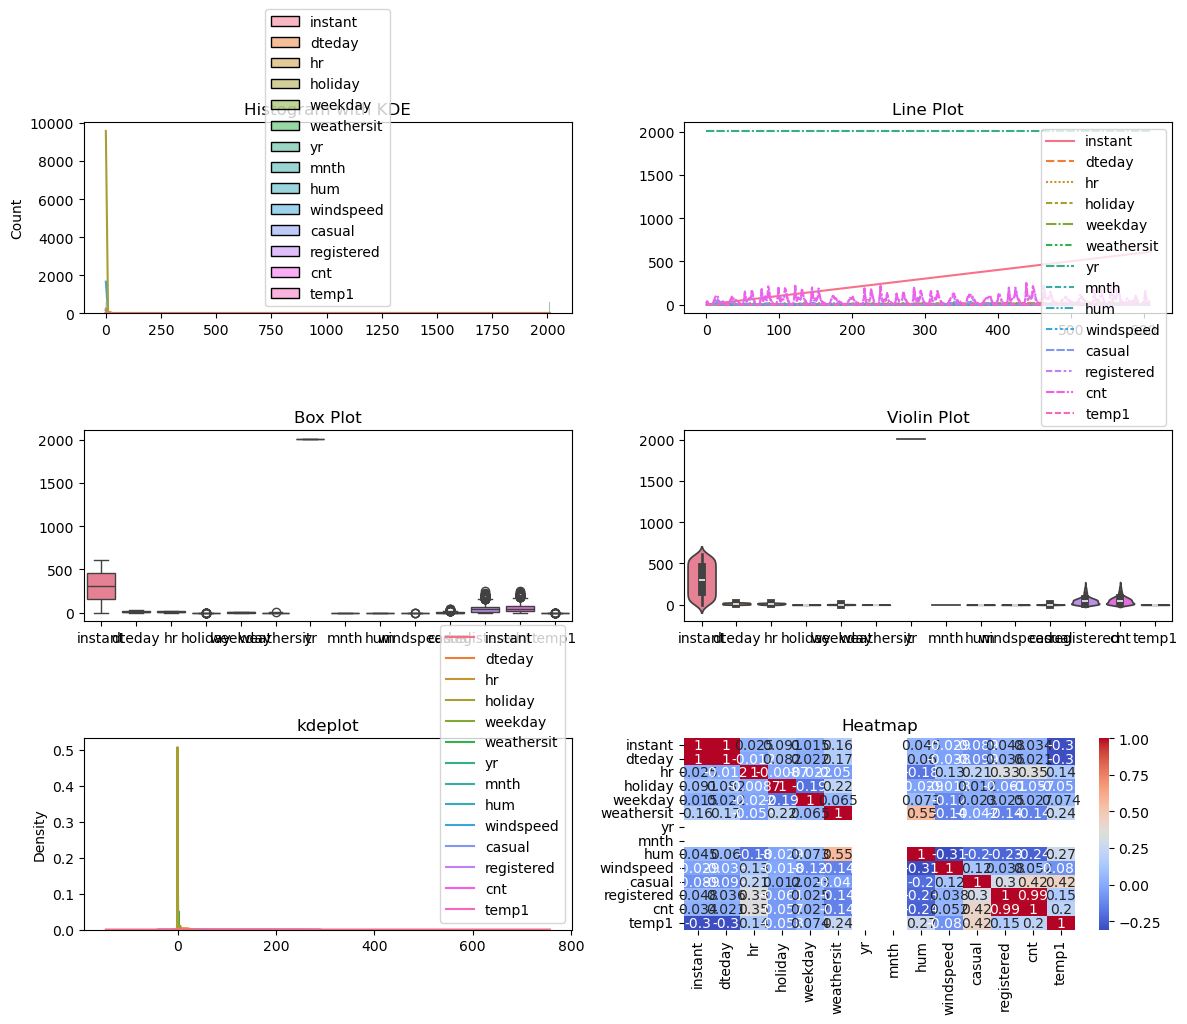

In [49]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3x2 grid of plots

# Histogram
sns.histplot(df, kde=True, ax=axes[0, 0])  # First subplot (top-left)
axes[0, 0].set_title('Histogram with KDE')

# Line plot
sns.lineplot(df,ax=axes[0, 1])  # First row, second column
axes[0, 1].set_title('Line Plot')

# Box plot
sns.boxplot(df,ax=axes[1, 0])  # Second row, first column
axes[1, 0].set_title('Box Plot')

# Violin plot
sns.violinplot(df,ax=axes[1, 1])  # Second row, second column
axes[1, 1].set_title('Violin Plot')

#kdeplot
sns.kdeplot(df,ax=axes[2,0])
axes[2,0].set_title('kdeplot')
#heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axes[2, 1])  # Fourth row, right
axes[2, 1].set_title('Heatmap')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
dataset_3=pd.read_excel("dataset_3.csv")

In [51]:
dataset_3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,2011-01-28,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,2011-01-28,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,2011-01-28,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [52]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     390 non-null    int64         
 1   dteday      390 non-null    datetime64[ns]
 2   season      390 non-null    int64         
 3   yr          390 non-null    int64         
 4   mnth        390 non-null    int64         
 5   hr          390 non-null    int64         
 6   holiday     390 non-null    bool          
 7   weekday     390 non-null    int64         
 8   weathersit  390 non-null    int64         
 9   temp        390 non-null    float64       
 10  atemp       390 non-null    float64       
 11  hum         390 non-null    float64       
 12  windspeed   390 non-null    float64       
 13  casual      390 non-null    int64         
 14  registered  390 non-null    int64         
 15  cnt         390 non-null    int64         
dtypes: bool(1), datetime64[ns]

In [53]:
dataset_3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [54]:
dataset_3.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                 bool
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [55]:
# Check for missing values
dataset_3.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [56]:
# Handle missing values
dataset_3.fillna(dataset_3.median, inplace=True) 

In [57]:
dataset_3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,2011-01-28,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,2011-01-28,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,2011-01-28,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [58]:
# Drop unnecessary columns
dataset_3.drop(columns=['yr', 'mnth'," "], errors='ignore', inplace=True)

In [59]:
dataset_3

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,2011-01-28,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,2011-01-28,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,2011-01-28,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [60]:
#print("\nData After Cleaning:")
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     390 non-null    int64         
 1   dteday      390 non-null    datetime64[ns]
 2   season      390 non-null    int64         
 3   hr          390 non-null    int64         
 4   holiday     390 non-null    bool          
 5   weekday     390 non-null    int64         
 6   weathersit  390 non-null    int64         
 7   temp        390 non-null    float64       
 8   atemp       390 non-null    float64       
 9   hum         390 non-null    float64       
 10  windspeed   390 non-null    float64       
 11  casual      390 non-null    int64         
 12  registered  390 non-null    int64         
 13  cnt         390 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(8)
memory usage: 40.1 KB


In [61]:
# Convert datetime[ns] to object
dataset_3['dteday'] = dataset_3['dteday'].astype('object')

In [62]:
dataset_3

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29 00:00:00,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29 00:00:00,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29 00:00:00,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29 00:00:00,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29 00:00:00,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28 00:00:00,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,2011-01-28 00:00:00,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,2011-01-28 00:00:00,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,2011-01-28 00:00:00,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [63]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     390 non-null    int64  
 1   dteday      390 non-null    object 
 2   season      390 non-null    int64  
 3   hr          390 non-null    int64  
 4   holiday     390 non-null    bool   
 5   weekday     390 non-null    int64  
 6   weathersit  390 non-null    int64  
 7   temp        390 non-null    float64
 8   atemp       390 non-null    float64
 9   hum         390 non-null    float64
 10  windspeed   390 non-null    float64
 11  casual      390 non-null    int64  
 12  registered  390 non-null    int64  
 13  cnt         390 non-null    int64  
dtypes: bool(1), float64(4), int64(8), object(1)
memory usage: 40.1+ KB


In [64]:
missing_values = dataset_3.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant       0
dteday        0
season        0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [65]:
dataset_3.fillna(dataset_3.mean(numeric_only=True), inplace=True)

In [66]:
dataset_3

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29 00:00:00,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29 00:00:00,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29 00:00:00,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29 00:00:00,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29 00:00:00,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28 00:00:00,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,2011-01-28 00:00:00,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,2011-01-28 00:00:00,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,2011-01-28 00:00:00,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [67]:
dataset_3["temp1"]=(dataset_3["temp"]+dataset_3["atemp"])/2

In [68]:
dataset_3

,instant,dteday,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp1
0,620,2011-01-29 00:00:00,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20,0.22365
1,621,2011-01-29 00:00:00,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15,0.22365
2,622,2011-01-29 00:00:00,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8,0.20605
3,623,2011-01-29 00:00:00,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3,0.17090
4,624,2011-01-29 00:00:00,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2,0.17090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28 00:00:00,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62,0.23365
386,616,2011-01-28 00:00:00,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58,0.22365
387,617,2011-01-28 00:00:00,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26,0.22605
388,618,2011-01-28 00:00:00,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23,0.23365


In [69]:
# Drop unnecessary columns
dataset_3.drop(columns=['temp','atemp'], errors='ignore', inplace=True)

In [70]:
dataset_3

,instant,dteday,season,hr,holiday,weekday,weathersit,hum,windspeed,casual,registered,cnt,temp1
0,620,2011-01-29 00:00:00,1,1,False,6,1,0.64,0.1940,0,20,20,0.22365
1,621,2011-01-29 00:00:00,1,2,False,6,1,0.64,0.1642,0,15,15,0.22365
2,622,2011-01-29 00:00:00,1,3,False,6,1,0.64,0.1343,3,5,8,0.20605
3,623,2011-01-29 00:00:00,1,4,False,6,1,0.69,0.1045,1,2,3,0.17090
4,624,2011-01-29 00:00:00,1,6,False,6,1,0.64,0.1343,0,2,2,0.17090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28 00:00:00,1,20,False,5,2,0.70,0.1940,1,61,62,0.23365
386,616,2011-01-28 00:00:00,1,21,False,5,2,0.75,0.1343,1,57,58,0.22365
387,617,2011-01-28 00:00:00,1,22,False,5,1,0.65,0.3582,0,26,26,0.22605
388,618,2011-01-28 00:00:00,1,23,False,5,1,0.60,0.2239,1,22,23,0.23365


In [71]:
dataset_3.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,390.0,805.500000,112.727548,611.0000,708.25000,805.500000,902.7500,1000.0000
season,390.0,1.000000,0.000000,1.0000,1.00000,1.000000,1.0000,1.0000
hr,390.0,11.687179,6.980295,0.0000,6.00000,12.000000,18.0000,23.0000
weekday,390.0,2.989744,2.149884,0.0000,1.00000,3.000000,5.0000,6.0000
weathersit,390.0,1.484615,0.663805,1.0000,1.00000,1.000000,2.0000,3.0000
hum,390.0,0.613769,0.202361,0.2100,0.45000,0.600000,0.7500,1.0000
windspeed,390.0,0.179416,0.138551,0.0000,0.08960,0.164200,0.2836,0.5821
casual,390.0,5.576923,9.317478,0.0000,1.00000,3.000000,6.0000,62.0000
registered,390.0,57.002564,49.070198,0.0000,17.00000,48.000000,83.7500,236.0000
cnt,390.0,62.579487,53.274838,1.0000,18.50000,52.000000,88.7500,243.0000


In [72]:
dataset_3['dteday']=pd.to_datetime(dataset_3['dteday'])
dataset_3['yr']=dataset_3['dteday'].dt.year
dataset_3['mnth']=dataset_3['dteday'].dt.month
dataset_3['dteday']=dataset_3['dteday'].dt.day

In [73]:
dataset_3

,instant,dteday,season,hr,holiday,weekday,weathersit,hum,windspeed,casual,registered,cnt,temp1,yr,mnth
0,620,29,1,1,False,6,1,0.64,0.1940,0,20,20,0.22365,2011,1
1,621,29,1,2,False,6,1,0.64,0.1642,0,15,15,0.22365,2011,1
2,622,29,1,3,False,6,1,0.64,0.1343,3,5,8,0.20605,2011,1
3,623,29,1,4,False,6,1,0.69,0.1045,1,2,3,0.17090,2011,1
4,624,29,1,6,False,6,1,0.64,0.1343,0,2,2,0.17090,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28,1,20,False,5,2,0.70,0.1940,1,61,62,0.23365,2011,1
386,616,28,1,21,False,5,2,0.75,0.1343,1,57,58,0.22365,2011,1
387,617,28,1,22,False,5,1,0.65,0.3582,0,26,26,0.22605,2011,1
388,618,28,1,23,False,5,1,0.60,0.2239,1,22,23,0.23365,2011,1


In [74]:
df_final=pd.concat([df, dataset_3], axis=0, ignore_index=True)

In [75]:
df_final

,instant,dteday,hr,holiday,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1,season
0,1,1,0,False,6,1,2011,1,0.81,0.0000,3,13,16,0.26395,NaN
1,2,1,1,False,6,1,2011,1,0.80,0.0000,8,32,40,0.24635,NaN
2,3,1,2,False,6,1,2011,1,0.80,0.0000,5,27,32,0.24635,NaN
3,4,1,3,False,6,1,2011,1,0.75,0.0000,3,10,13,0.26395,NaN
4,5,1,4,False,6,1,2011,1,0.75,0.0000,0,1,1,0.26395,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28,20,False,5,2,2011,1,0.70,0.1940,1,61,62,0.23365,1.0
996,616,28,21,False,5,2,2011,1,0.75,0.1343,1,57,58,0.22365,1.0
997,617,28,22,False,5,1,2011,1,0.65,0.3582,0,26,26,0.22605,1.0
998,618,28,23,False,5,1,2011,1,0.60,0.2239,1,22,23,0.23365,1.0


In [76]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     1000 non-null   int64  
 1   dteday      1000 non-null   int32  
 2   hr          1000 non-null   int64  
 3   holiday     1000 non-null   bool   
 4   weekday     1000 non-null   int64  
 5   weathersit  1000 non-null   int64  
 6   yr          1000 non-null   int32  
 7   mnth        1000 non-null   int32  
 8   hum         1000 non-null   float64
 9   windspeed   1000 non-null   float64
 10  casual      1000 non-null   int64  
 11  registered  1000 non-null   int64  
 12  cnt         1000 non-null   int64  
 13  temp1       1000 non-null   float64
 14  season      390 non-null    float64
dtypes: bool(1), float64(4), int32(3), int64(7)
memory usage: 98.8 KB


In [77]:
lb=LabelEncoder()
df_final["holiday_code"]=lb.fit_transform(df_final["holiday"])

In [78]:
df_final

,instant,dteday,hr,holiday,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1,season,holiday_code
0,1,1,0,False,6,1,2011,1,0.81,0.0000,3,13,16,0.26395,NaN,0
1,2,1,1,False,6,1,2011,1,0.80,0.0000,8,32,40,0.24635,NaN,0
2,3,1,2,False,6,1,2011,1,0.80,0.0000,5,27,32,0.24635,NaN,0
3,4,1,3,False,6,1,2011,1,0.75,0.0000,3,10,13,0.26395,NaN,0
4,5,1,4,False,6,1,2011,1,0.75,0.0000,0,1,1,0.26395,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28,20,False,5,2,2011,1,0.70,0.1940,1,61,62,0.23365,1.0,0
996,616,28,21,False,5,2,2011,1,0.75,0.1343,1,57,58,0.22365,1.0,0
997,617,28,22,False,5,1,2011,1,0.65,0.3582,0,26,26,0.22605,1.0,0
998,618,28,23,False,5,1,2011,1,0.60,0.2239,1,22,23,0.23365,1.0,0


In [79]:
df_final.drop("holiday",axis=1, inplace=True)

In [80]:
df_final

,instant,dteday,hr,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1,season,holiday_code
0,1,1,0,6,1,2011,1,0.81,0.0000,3,13,16,0.26395,NaN,0
1,2,1,1,6,1,2011,1,0.80,0.0000,8,32,40,0.24635,NaN,0
2,3,1,2,6,1,2011,1,0.80,0.0000,5,27,32,0.24635,NaN,0
3,4,1,3,6,1,2011,1,0.75,0.0000,3,10,13,0.26395,NaN,0
4,5,1,4,6,1,2011,1,0.75,0.0000,0,1,1,0.26395,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28,20,5,2,2011,1,0.70,0.1940,1,61,62,0.23365,1.0,0
996,616,28,21,5,2,2011,1,0.75,0.1343,1,57,58,0.22365,1.0,0
997,617,28,22,5,1,2011,1,0.65,0.3582,0,26,26,0.22605,1.0,0
998,618,28,23,5,1,2011,1,0.60,0.2239,1,22,23,0.23365,1.0,0


In [81]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       1000 non-null   int64  
 1   dteday        1000 non-null   int32  
 2   hr            1000 non-null   int64  
 3   weekday       1000 non-null   int64  
 4   weathersit    1000 non-null   int64  
 5   yr            1000 non-null   int32  
 6   mnth          1000 non-null   int32  
 7   hum           1000 non-null   float64
 8   windspeed     1000 non-null   float64
 9   casual        1000 non-null   int64  
 10  registered    1000 non-null   int64  
 11  cnt           1000 non-null   int64  
 12  temp1         1000 non-null   float64
 13  season        390 non-null    float64
 14  holiday_code  1000 non-null   int64  
dtypes: float64(4), int32(3), int64(8)
memory usage: 105.6 KB


In [82]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,1000.0,500.500000,288.819436,1.00,250.750000,500.50000,750.25000,1000.00000
dteday,1000.0,12.992000,8.656724,1.00,6.000000,11.00000,20.00000,31.00000
hr,1000.0,11.753000,6.899101,0.00,6.000000,12.00000,18.00000,23.00000
weekday,1000.0,2.982000,2.091423,0.00,1.000000,3.00000,5.00000,6.00000
weathersit,1000.0,1.480000,0.651171,1.00,1.000000,1.00000,2.00000,4.00000
yr,1000.0,2011.000000,0.000000,2011.00,2011.000000,2011.00000,2011.00000,2011.00000
mnth,1000.0,1.312000,0.463542,1.00,1.000000,1.00000,2.00000,2.00000
hum,1000.0,0.582480,0.187977,0.21,0.440000,0.55000,0.70000,1.00000
windspeed,1000.0,0.194931,0.129126,0.00,0.104500,0.16420,0.28360,0.58210
casual,1000.0,4.921000,7.643899,0.00,0.000000,3.00000,6.00000,62.00000


In [83]:
df_final.isnull().sum()

instant           0
dteday            0
hr                0
weekday           0
weathersit        0
yr                0
mnth              0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
temp1             0
season          610
holiday_code      0
dtype: int64

In [84]:
#filling the null values using .fillna()
df_final["season"]=df_final["season"].fillna(df_final["season"].mean())

In [85]:
df_final

,instant,dteday,hr,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1,season,holiday_code
0,1,1,0,6,1,2011,1,0.81,0.0000,3,13,16,0.26395,1.0,0
1,2,1,1,6,1,2011,1,0.80,0.0000,8,32,40,0.24635,1.0,0
2,3,1,2,6,1,2011,1,0.80,0.0000,5,27,32,0.24635,1.0,0
3,4,1,3,6,1,2011,1,0.75,0.0000,3,10,13,0.26395,1.0,0
4,5,1,4,6,1,2011,1,0.75,0.0000,0,1,1,0.26395,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28,20,5,2,2011,1,0.70,0.1940,1,61,62,0.23365,1.0,0
996,616,28,21,5,2,2011,1,0.75,0.1343,1,57,58,0.22365,1.0,0
997,617,28,22,5,1,2011,1,0.65,0.3582,0,26,26,0.22605,1.0,0
998,618,28,23,5,1,2011,1,0.60,0.2239,1,22,23,0.23365,1.0,0


In [86]:
df_final.isnull().sum()

instant         0
dteday          0
hr              0
weekday         0
weathersit      0
yr              0
mnth            0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
temp1           0
season          0
holiday_code    0
dtype: int64

In [87]:
median_values= df.median()
print("Median values for all numeric columns:")
print(median_values)

Median values for all numeric columns:
instant        305.50000
dteday          14.00000
hr              12.00000
holiday          0.00000
weekday          3.00000
weathersit       1.00000
yr            2011.00000
mnth             1.00000
hum              0.52000
windspeed        0.19400
casual           2.00000
registered      43.00000
cnt             47.00000
temp1            0.19605
dtype: float64


In [88]:
mean_values= df.mean()
print("Mean values for all numeric columns:")
print(mean_values)

Mean values for all numeric columns:
instant        305.500000
dteday          13.824590
hr              11.795082
holiday          0.039344
weekday          2.977049
weathersit       1.477049
yr            2011.000000
mnth             1.000000
hum              0.562475
windspeed        0.204851
casual           4.501639
registered      51.068852
cnt             55.570492
temp1            0.198410
dtype: float64


In [89]:
df.duplicated().sum()

0

In [90]:
def am_or_pm(x): 
    if x > 11: 
        return 1
    else: 
        return 0
  

df_final['am_or_pm']=df['hr'].apply(am_or_pm)

In [91]:
df_final

,instant,dteday,hr,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1,season,holiday_code,am_or_pm
0,1,1,0,6,1,2011,1,0.81,0.0000,3,13,16,0.26395,1.0,0,0.0
1,2,1,1,6,1,2011,1,0.80,0.0000,8,32,40,0.24635,1.0,0,0.0
2,3,1,2,6,1,2011,1,0.80,0.0000,5,27,32,0.24635,1.0,0,0.0
3,4,1,3,6,1,2011,1,0.75,0.0000,3,10,13,0.26395,1.0,0,0.0
4,5,1,4,6,1,2011,1,0.75,0.0000,0,1,1,0.26395,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28,20,5,2,2011,1,0.70,0.1940,1,61,62,0.23365,1.0,0,NaN
996,616,28,21,5,2,2011,1,0.75,0.1343,1,57,58,0.22365,1.0,0,NaN
997,617,28,22,5,1,2011,1,0.65,0.3582,0,26,26,0.22605,1.0,0,NaN
998,618,28,23,5,1,2011,1,0.60,0.2239,1,22,23,0.23365,1.0,0,NaN


In [92]:
#filling the null values using .fillna()
df_final["am_or_pm"]=df_final["am_or_pm"].fillna(df_final["am_or_pm"].mean())

In [93]:
df_final

,instant,dteday,hr,weekday,weathersit,yr,mnth,hum,windspeed,casual,registered,cnt,temp1,season,holiday_code,am_or_pm
0,1,1,0,6,1,2011,1,0.81,0.0000,3,13,16,0.26395,1.0,0,0.000000
1,2,1,1,6,1,2011,1,0.80,0.0000,8,32,40,0.24635,1.0,0,0.000000
2,3,1,2,6,1,2011,1,0.80,0.0000,5,27,32,0.24635,1.0,0,0.000000
3,4,1,3,6,1,2011,1,0.75,0.0000,3,10,13,0.26395,1.0,0,0.000000
4,5,1,4,6,1,2011,1,0.75,0.0000,0,1,1,0.26395,1.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,28,20,5,2,2011,1,0.70,0.1940,1,61,62,0.23365,1.0,0,0.521311
996,616,28,21,5,2,2011,1,0.75,0.1343,1,57,58,0.22365,1.0,0,0.521311
997,617,28,22,5,1,2011,1,0.65,0.3582,0,26,26,0.22605,1.0,0,0.521311
998,618,28,23,5,1,2011,1,0.60,0.2239,1,22,23,0.23365,1.0,0,0.521311


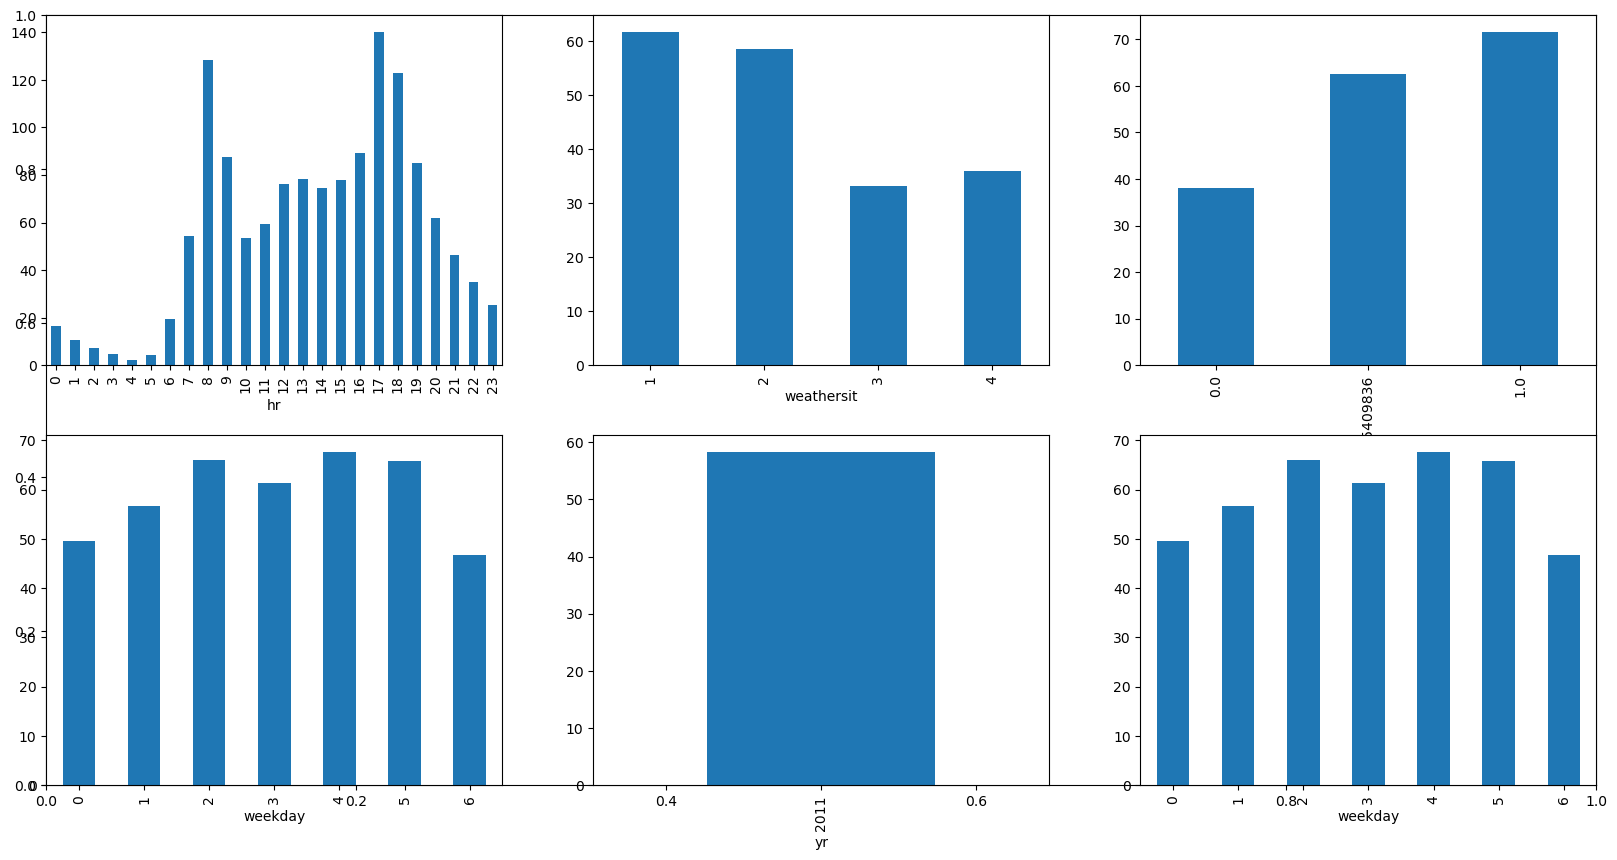

In [95]:
features = ['hr', 'weathersit','am_or_pm','weekday','yr', 'weekday'] 
  
plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    df_final.groupby(col).mean()['cnt'].plot.bar() 
plt.show()

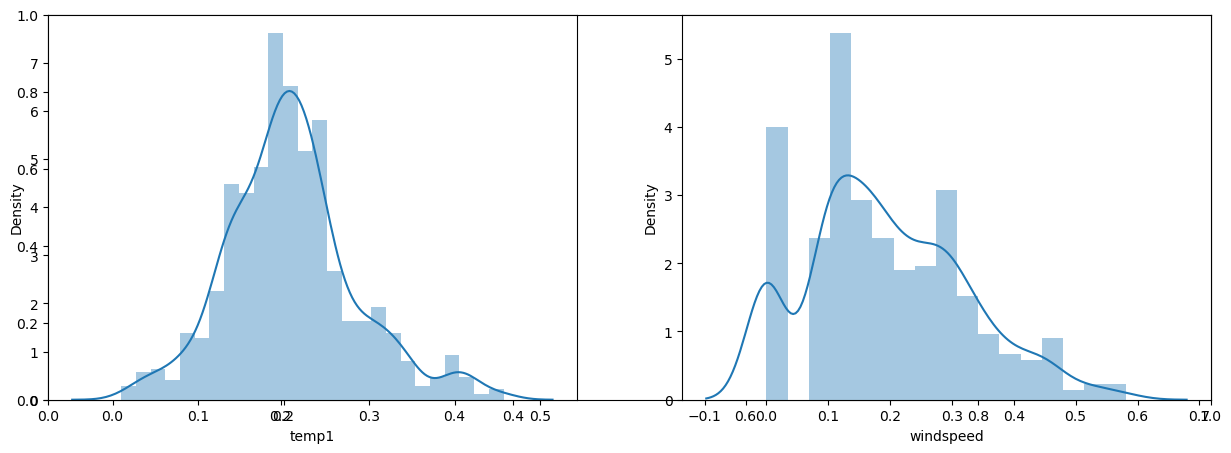

In [96]:
features = ['temp1', 'windspeed'] 
  
plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
  plt.subplot(1, 2, i + 1) 
  sns.distplot(df_final[col]) 
plt.show()

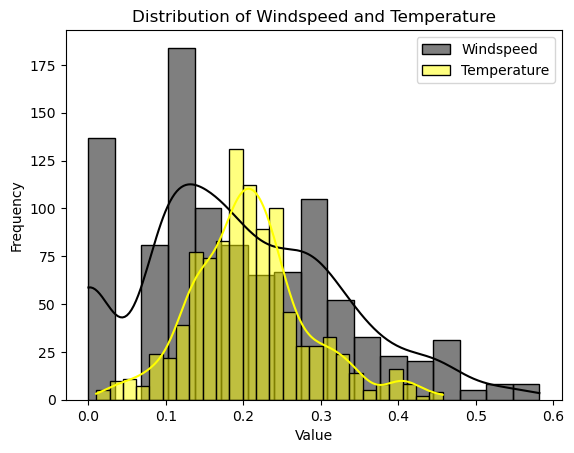

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_final, x="windspeed",kde=True, color="Black", label="Windspeed")
sns.histplot(data=df_final, x="temp1", kde=True,color="yellow", label="Temperature")
plt.legend()
plt.title("Distribution of Windspeed and Temperature")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

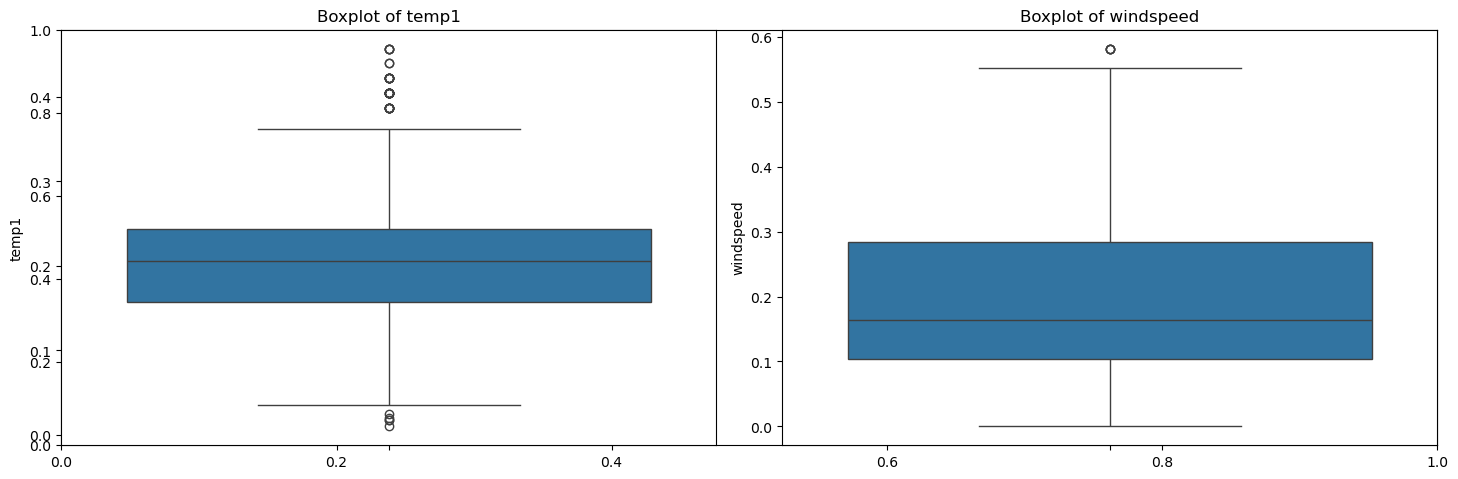

In [98]:
features = ['temp1', 'windspeed']

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1) 
    sns.boxplot(y=df_final[col]) 
    plt.title(f'Boxplot of {col}')  
plt.tight_layout() 
plt.show()

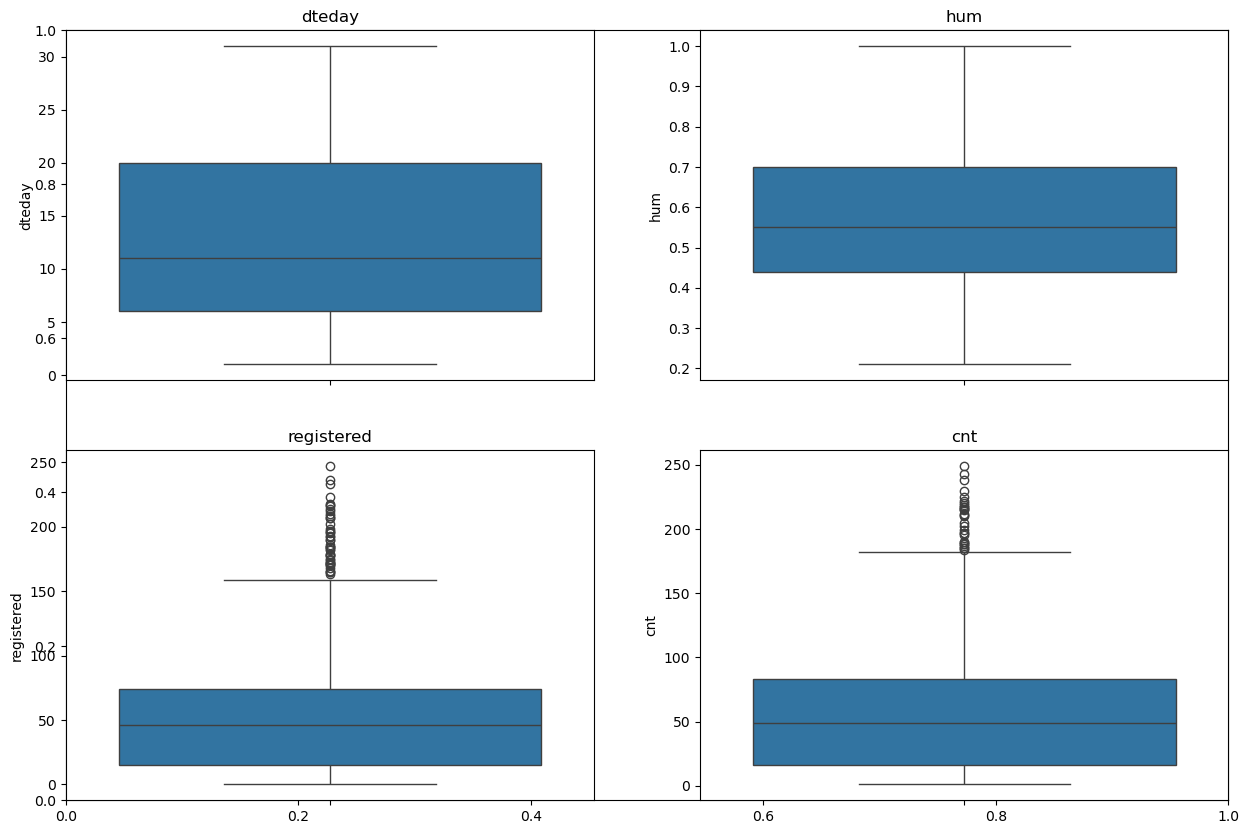

In [99]:
features = ['dteday', 'hum', 'registered', 'cnt'] 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sns.boxplot(df_final[col])
    plt.title(col)
plt.show()

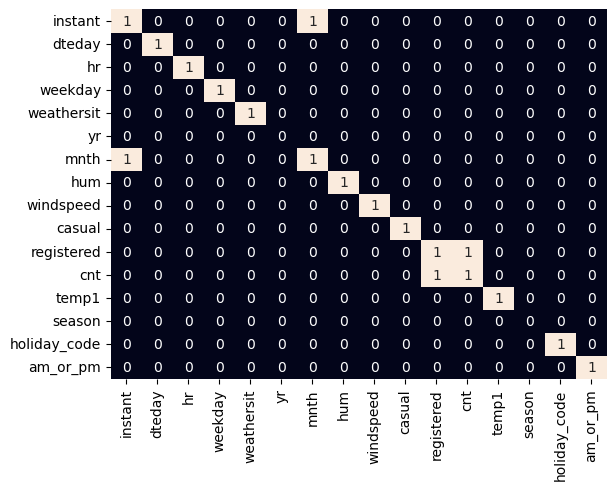

In [100]:
sns.heatmap(df_final.corr() > 0.8,annot=True,cbar=False) 
plt.show()

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
num_column=df_final.select_dtypes(include=['float64','int64']).columns

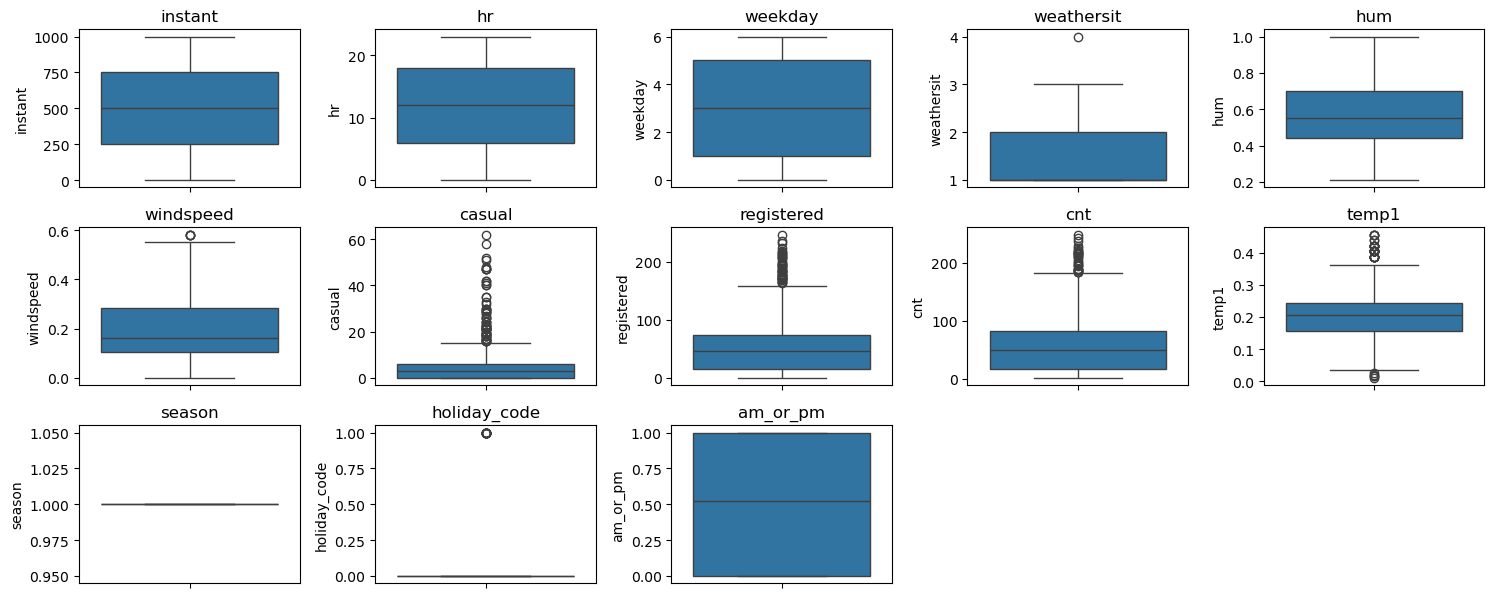

In [103]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_column,1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df_final[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [104]:
#checking number of outliers for each numerical key feature using IQR method

# Initialize a dictionary to store the number of outliers for each feature
outliers_count = {}

# Calculate the number of outliers using the IQR method
for feature in num_column:
    if feature in df_final.columns:
        Q1 = df_final[feature].quantile(0.25)
        Q3 = df_final[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outliers = df_final[(df_final[feature] < lower_limit) | (df_final[feature] > upper_limit)]
        outliers_count[feature] = len(outliers)
        
    else:
        print(f"Column '{feature}' not found in DataFrame")

# Display the number of outliers for each key feature
print("Number of outliers in each key feature:")
for feature, count in outliers_count.items():
    print(f"{feature}:{count}")

Number of outliers in each key feature:
instant:0
hr:0
weekday:0
weathersit:1
hum:0
windspeed:4
casual:66
registered:45
cnt:30
temp1:43
season:0
holiday_code:24
am_or_pm:0


In [105]:
#FOR WEATHERSIT FEATURE-

q1=df_final["weathersit"].quantile(0.25)
q2=df_final["weathersit"].quantile(0.50)
q3=df_final["weathersit"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

IQR=q3-q1
print("The inner quantile is",IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower_limit is",lower_limit)
print("The upper limit is",upper_limit)

df_final["weathersit"] = np.where(df_final["weathersit"] < 3.5, df_final["weathersit"], 3.5)

The first quantile is 1.0
The second quantile is 1.0
The third quantile is 2.0
The inner quantile is 1.0
The lower_limit is -0.5
The upper limit is 3.5


In [106]:
q1=df_final["casual"].quantile(0.25)
q2=df_final["casual"].quantile(0.50)
q3=df_final["casual"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

IQR=q3-q1
print("The inner quantile is",IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower_limit is",lower_limit)
print("The upper limit is",upper_limit)

#Handling Outlier imputing the values of casual column which are more than 15 using np.where clause

df_final["casual"] = np.where(df_final["casual"] < 16, df_final["casual"], 15)

The first quantile is 0.0
The second quantile is 3.0
The third quantile is 6.0
The inner quantile is 6.0
The lower_limit is -9.0
The upper limit is 15.0


In [107]:
df_final["temp1"].mean()

0.20886279190317197

In [108]:
q1=df_final["temp1"].quantile(0.25)
q2=df_final["temp1"].quantile(0.50)
q3=df_final["temp1"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

IQR=q3-q1
print("The inner quantile is",IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower_limit is",lower_limit)
print("The upper limit is",upper_limit)

df_final["temp1"].mean()
print("the mean is",df_final["temp1"].mean())


df_final["temp1"] = np.where(df_final["temp1"] > 0.35595000000000004, df_final["temp1"].mean(), df_final["temp1"])
df_final["temp1"] = np.where(df_final["temp1"] < 0.05314999999999996, df_final["temp1"].mean(), df_final["temp1"])


The first quantile is 0.1575875
The second quantile is 0.20605
The third quantile is 0.24365
The inner quantile is 0.08606250000000001
The lower_limit is 0.028493749999999984
The upper limit is 0.37274375000000004
the mean is 0.20886279190317197


<Axes: ylabel='temp1'>

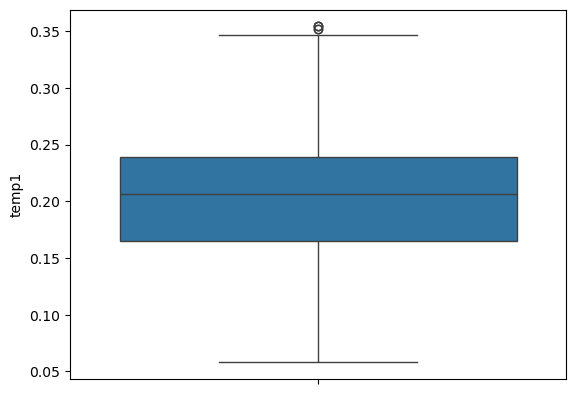

In [109]:
sns.boxplot(df_final["temp1"])

In [110]:
q1=df_final["windspeed"].quantile(0.25)
q2=df_final["windspeed"].quantile(0.50)
q3=df_final["windspeed"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

IQR=q3-q1
print("The inner quantile is",IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower_limit is",lower_limit)
print("The upper limit is",upper_limit)

df_final["windspeed"] = np.where(df_final["windspeed"] < 0.5522500000000001, df_final["windspeed"], 0.55)

The first quantile is 0.1045
The second quantile is 0.1642
The third quantile is 0.2836
The inner quantile is 0.17910000000000004
The lower_limit is -0.16415000000000007
The upper limit is 0.5522500000000001


In [111]:
q1=df_final["registered"].quantile(0.25)
q2=df_final["registered"].quantile(0.50)
q3=df_final["registered"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

IQR=q3-q1
print("The inner quantile is",IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower_limit is",lower_limit)
print("The upper limit is",upper_limit)

df_final["registered"] = np.where(df_final["registered"] < 162.5, df_final["registered"], 162.5)

The first quantile is 15.0
The second quantile is 46.0
The third quantile is 74.0
The inner quantile is 59.0
The lower_limit is -73.5
The upper limit is 162.5


In [112]:
q1=df_final["cnt"].quantile(0.25)
q2=df_final["cnt"].quantile(0.50)
q3=df_final["cnt"].quantile(0.75)
print("The first quantile is",q1)
print("The second quantile is",q2)
print("The third quantile is",q3)

IQR=q3-q1
print("The inner quantile is",IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("The lower_limit is",lower_limit)
print("The upper limit is",upper_limit)

df_final["cnt"] = np.where(df_final["cnt"] < 183.5, df_final["cnt"], 183.5)

The first quantile is 16.0
The second quantile is 49.0
The third quantile is 83.0
The inner quantile is 67.0
The lower_limit is -84.5
The upper limit is 183.5


In [113]:
outliers_count = {}

# Calculate the number of outliers using the IQR method
for feature in num_column:
    if feature in df_final.columns:
        Q1 = df_final[feature].quantile(0.25)
        Q3 = df_final[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outliers = df_final[(df_final[feature] < lower_limit) | (df_final[feature] > upper_limit)]
        outliers_count[feature] = len(outliers)
        
    else:
        print(f"Column '{feature}' not found in DataFrame")

# Display the number of outliers for each key feature
print("Number of outliers in each key feature:")
for feature, count in outliers_count.items():
    print(f"{feature}:{count}")

Number of outliers in each key feature:
instant:0
hr:0
weekday:0
weathersit:0
hum:0
windspeed:0
casual:0
registered:0
cnt:0
temp1:5
season:0
holiday_code:24
am_or_pm:0


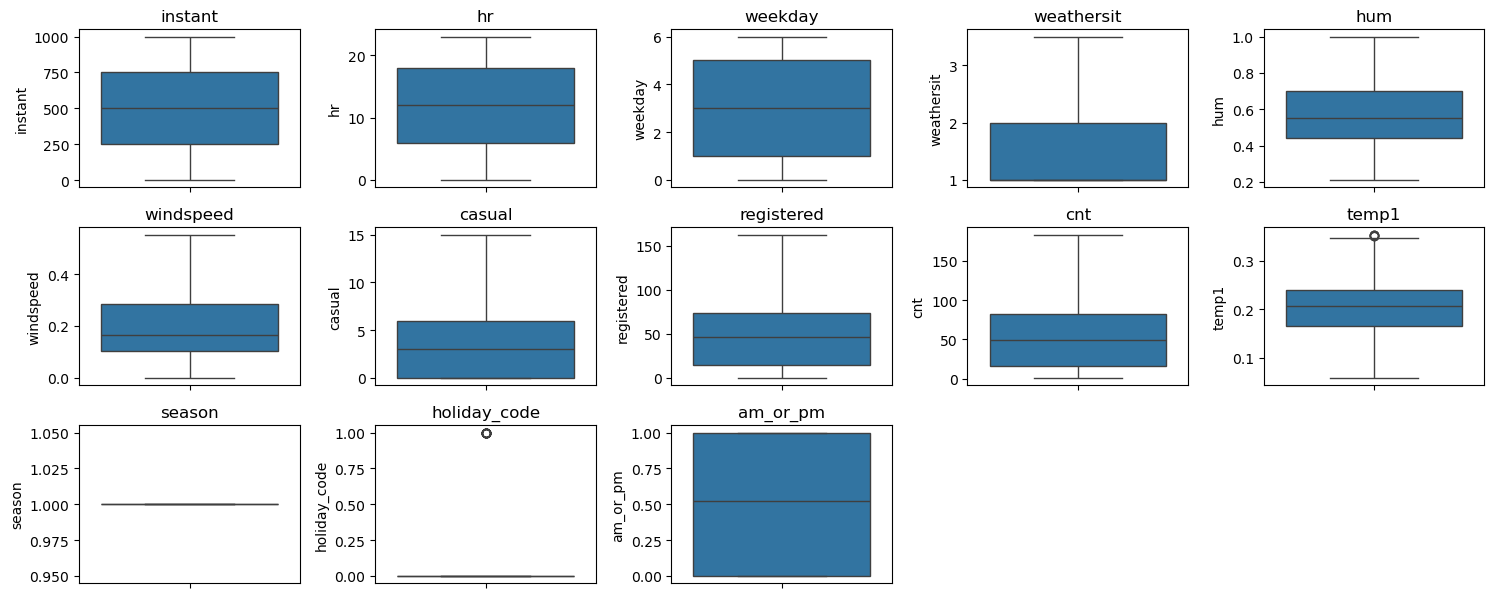

In [114]:
# after handling outliers
plt.figure(figsize=(15,10))
for i,col in enumerate(num_column,1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df_final[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

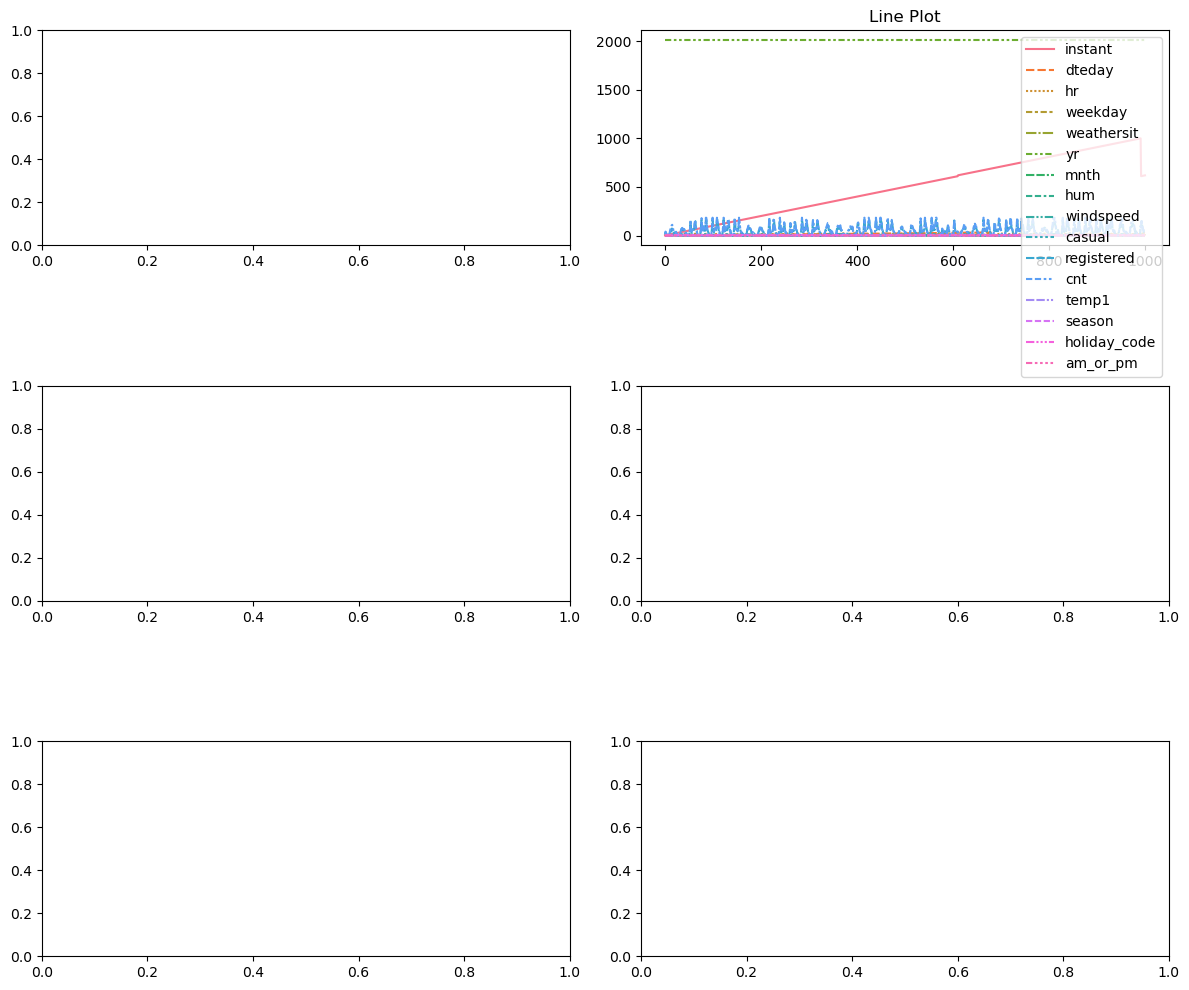

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10)) 
sns.lineplot(df_final,ax=axes[0, 1])  # First row, second column
axes[0, 1].set_title('Line Plot')
plt.tight_layout()
plt.show()

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,610.0,305.500000,176.236111,1.00,153.2500,305.50000,457.75000,610.00000
dteday,610.0,13.824590,7.803859,1.00,7.0000,14.00000,21.00000,28.00000
hr,610.0,11.795082,6.852107,0.00,6.0000,12.00000,18.00000,23.00000
weekday,610.0,2.977049,2.054943,0.00,1.0000,3.00000,5.00000,6.00000
weathersit,610.0,1.477049,0.643496,1.00,1.0000,1.00000,2.00000,4.00000
yr,610.0,2011.000000,0.000000,2011.00,2011.0000,2011.00000,2011.00000,2011.00000
mnth,610.0,1.000000,0.000000,1.00,1.0000,1.00000,1.00000,1.00000
hum,610.0,0.562475,0.175440,0.21,0.4325,0.52000,0.69000,1.00000
windspeed,610.0,0.204851,0.121806,0.00,0.1045,0.19400,0.28360,0.58210
casual,610.0,4.501639,6.319945,0.00,0.0000,2.00000,6.00000,47.00000


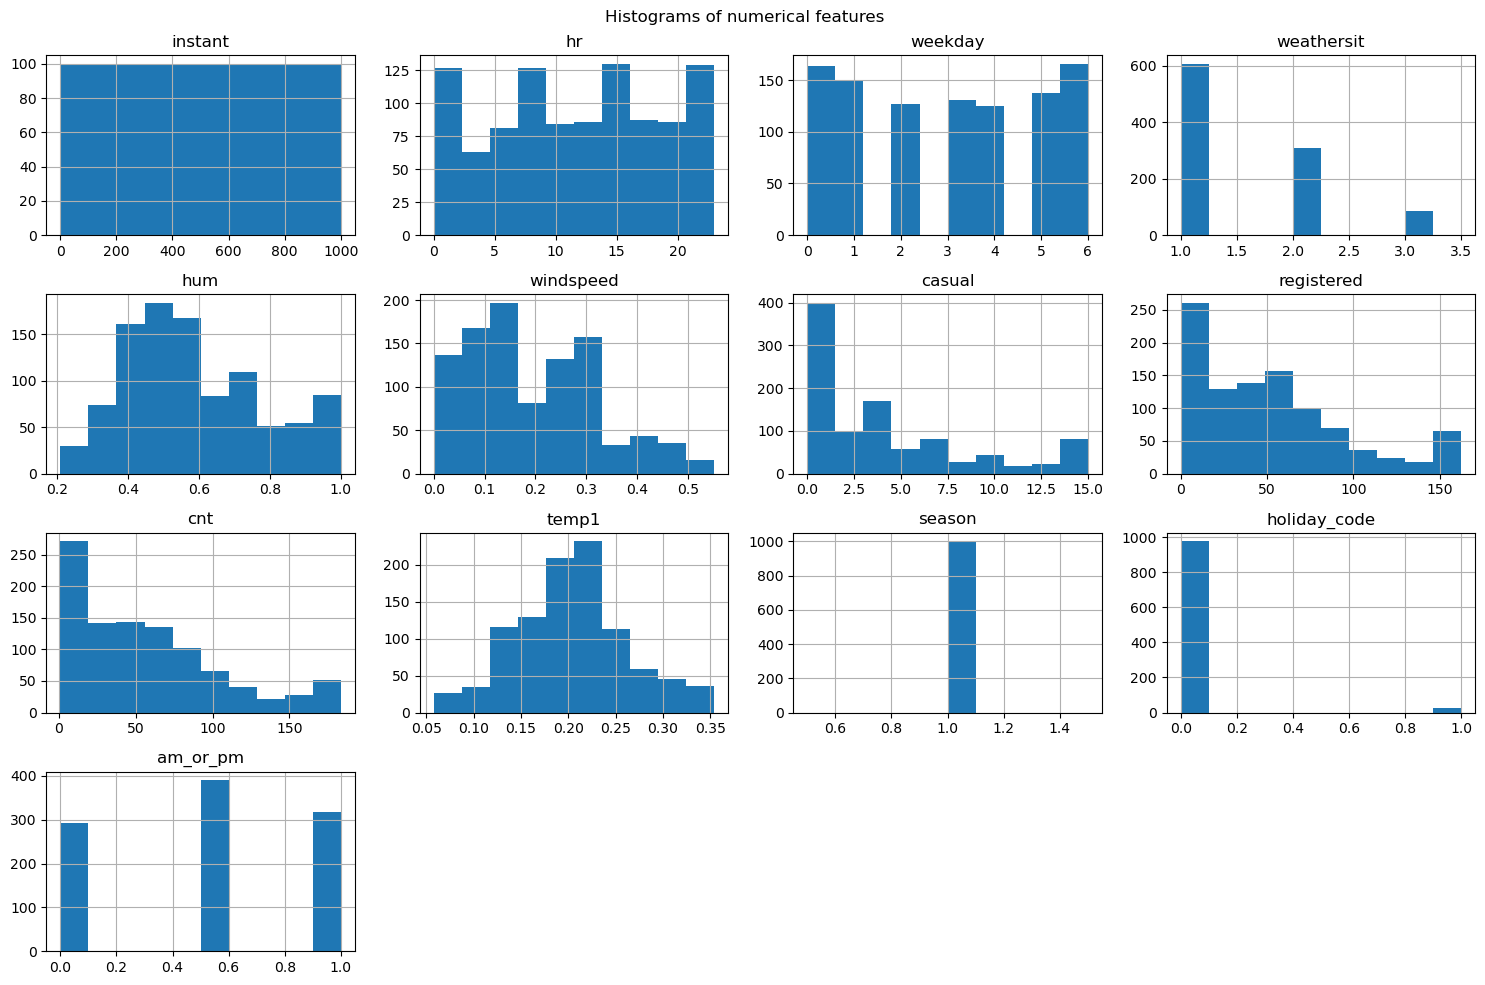

In [117]:
# Histograms
df_final[num_column].hist(bins=10, figsize=(15, 10))
plt.suptitle('Histograms of numerical features')
  
plt.tight_layout()
plt.show()

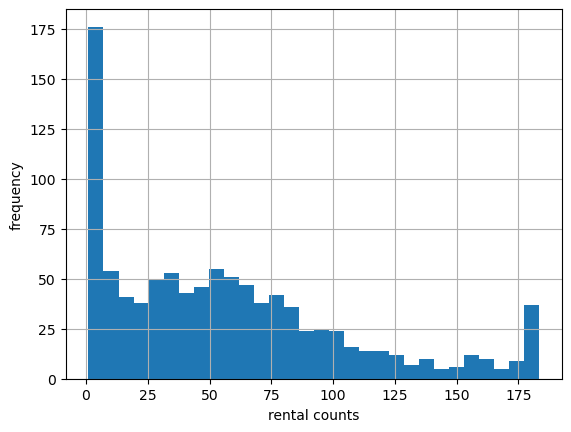

In [118]:
df_final['cnt'].hist(bins=30)

plt.title('')
plt.xlabel('rental counts')
plt.ylabel('frequency')
plt.show()

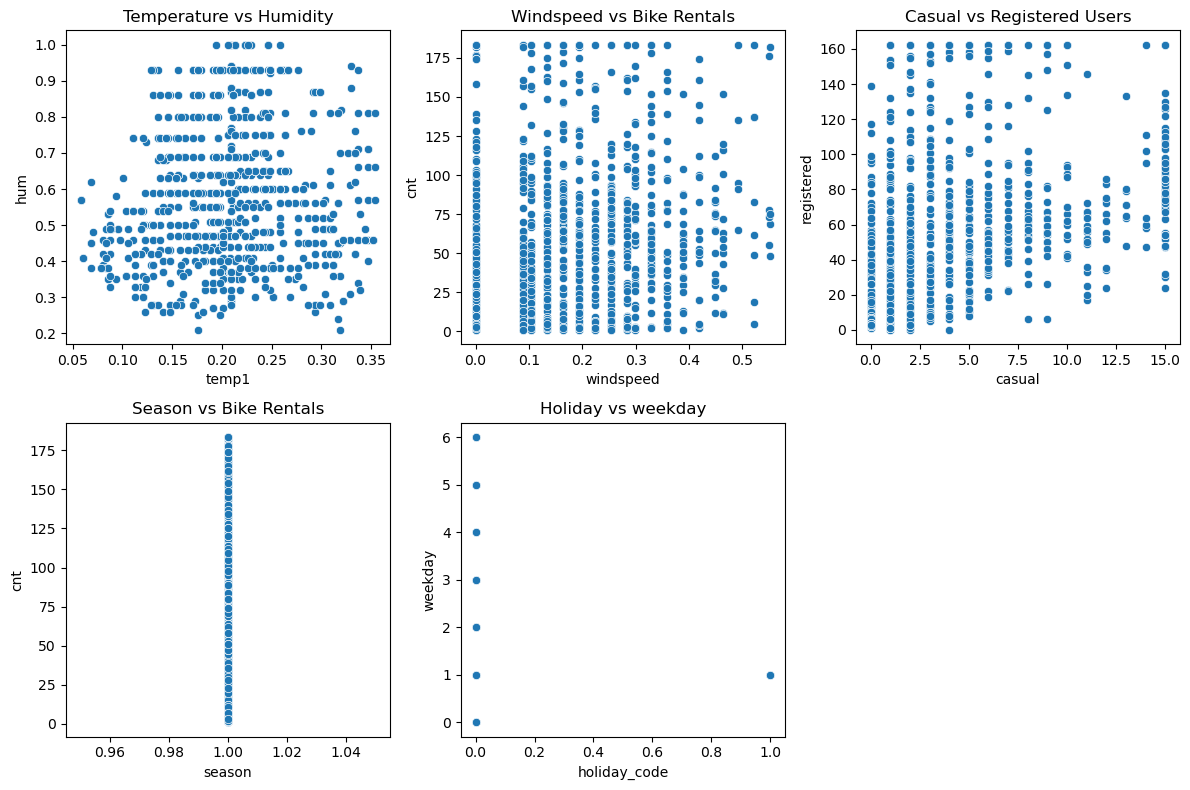

In [119]:
# Load  data (adjust the filename as needed)
# df = pd.read_csv('your_data.csv')

# Drop unnecessary columns and rows with NaN values
df_final = df_final.dropna(axis=1, how='all')  # Drop columns that are completely NaN
df_final = df_final.drop(columns=[col for col in df_final.columns if 'Unnamed' in col])  # Drop 'Unnamed' columns

# Choose relevant columns for scatter plots
columns_to_plot = ['temp1', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season','holiday_code','weekday']

# Creating scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot: Temperature vs Humidity
plt.subplot(2, 3, 1)  # 2x3 grid, 1st subplot
sns.scatterplot(x='temp1', y='hum', data=df_final)
plt.title('Temperature vs Humidity')

# Scatter plot: Windspeed vs Count of Bike Rentals (cnt)
plt.subplot(2, 3, 2)  # 2x3 grid, 2nd subplot
sns.scatterplot(x='windspeed', y='cnt', data=df_final)
plt.title('Windspeed vs Bike Rentals')

# Scatter plot: Casual users vs Registered users
plt.subplot(2, 3, 3)  # 2x3 grid, 3rd subplot
sns.scatterplot(x='casual', y='registered', data=df_final)
plt.title('Casual vs Registered Users')

# Scatter plot: Season vs Bike Rentals (cnt)
plt.subplot(2, 3, 4)  # 2x3 grid, 4th subplot
sns.scatterplot(x='season', y='cnt', data=df_final)
plt.title('Season vs Bike Rentals')

# Scatter plot: holiday vs weekday (cnt)
plt.subplot(2, 3, 5)  # 2x3 grid, 5th subplot
sns.scatterplot(x='holiday_code', y='weekday', data=df_final)
plt.title('Holiday vs weekday')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

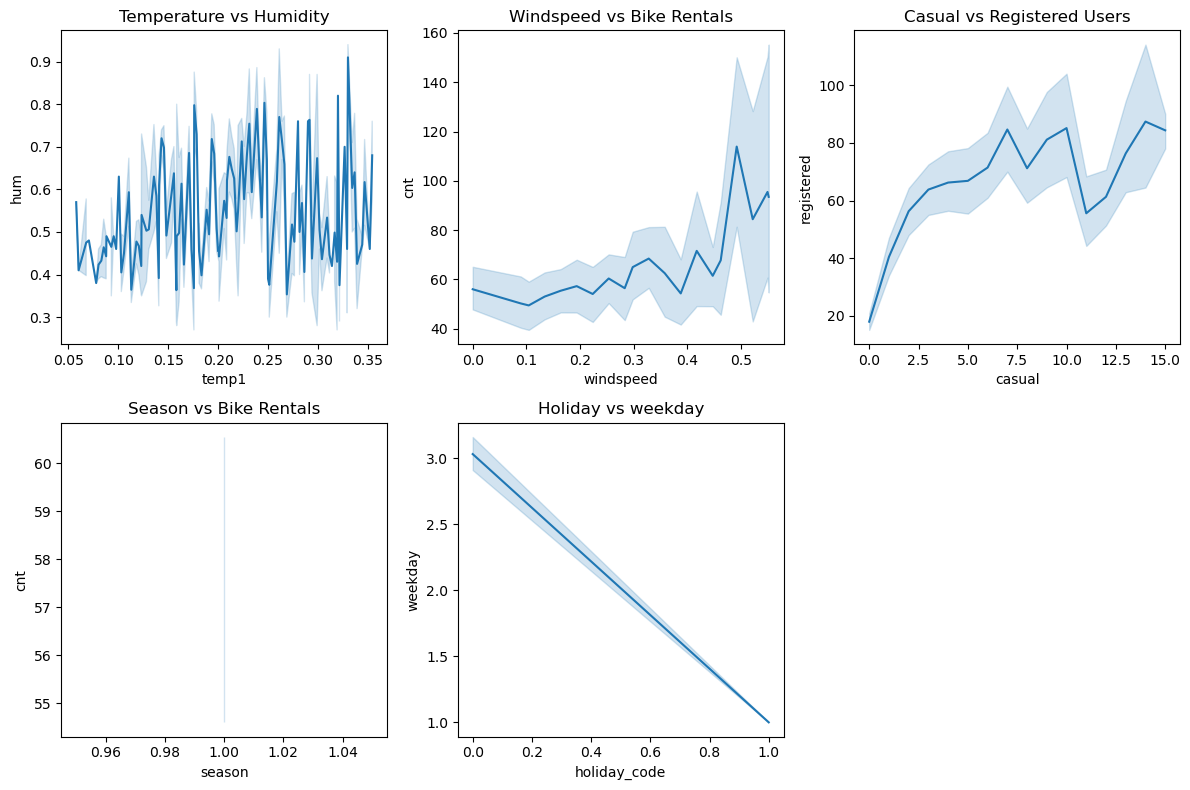

In [120]:
# Load  data (adjust the filename as needed)
# df = pd.read_csv('your_data.csv')

# Drop unnecessary columns and rows with NaN values
df_final = df_final.dropna(axis=1, how='all')  # Drop columns that are completely NaN
df_final = df_final.drop(columns=[col for col in df_final.columns if 'Unnamed' in col])  # Drop 'Unnamed' columns

# Choose relevant columns for line plots
columns_to_plot = ['temp1', 'hum', 'windspeed', 'casual', 'am_or_pm','registered', 'cnt', 'season','holiday_code','weekday']

# Creating Line plots
plt.figure(figsize=(12, 8))

# line plot: Temperature vs Humidity
plt.subplot(2, 3, 1)  # 2x3 grid, 1st subplot
sns.lineplot(x='temp1', y='hum', data=df_final)
plt.title('Temperature vs Humidity')

# line plot: Windspeed vs Count of Bike Rentals (cnt)
plt.subplot(2, 3, 2)  # 2x3 grid, 2nd subplot
sns.lineplot(x='windspeed', y='cnt', data=df_final)
plt.title('Windspeed vs Bike Rentals')

# line plot: Casual users vs Registered users
plt.subplot(2, 3, 3)  # 2x3 grid, 3rd subplot
sns.lineplot(x='casual', y='registered', data=df_final)
plt.title('Casual vs Registered Users')

# line plot: Season vs Bike Rentals (cnt)
plt.subplot(2, 3, 4)  # 2x3 grid, 4th subplot
sns.lineplot(x='season', y='cnt', data=df_final)
plt.title('Season vs Bike Rentals')

# Line plot: holiday vs weekday (cnt)
plt.subplot(2, 3, 5)  # 2x3 grid, 5th subplot
sns.lineplot(x='holiday_code', y='weekday', data=df_final)
plt.title('Holiday vs weekday')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Bar Chart

In [142]:
# Calculate the correlation matrix
correlation_matrix = df_final[num_column].corr()

In [143]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [144]:
correlation_matrix

,instant,hr,weekday,weathersit,hum,windspeed,casual,registered,cnt,temp1,season,holiday_code,am_or_pm
instant,1.000000,0.000060,0.008157,0.030293,0.062116,-0.058066,0.022284,0.077648,0.081803,0.090791,NaN,-0.063013,0.012910
hr,0.000060,1.000000,0.007531,-0.056427,-0.194853,0.116723,0.286666,0.388103,0.383688,0.158614,NaN,-0.005753,0.667622
weekday,0.008157,0.007531,1.000000,0.060162,0.062469,-0.057283,-0.030732,0.021644,0.011656,-0.015567,NaN,-0.148682,-0.015574
weathersit,0.030293,-0.056427,0.060162,1.000000,0.539428,-0.178706,-0.109843,-0.124809,-0.129774,0.105343,NaN,0.166009,-0.039253
hum,0.062116,-0.194853,0.062469,0.539428,1.000000,-0.385251,-0.297555,-0.247171,-0.265826,0.106496,NaN,-0.037542,-0.182898
windspeed,-0.058066,0.116723,-0.057283,-0.178706,-0.385251,1.000000,0.114481,0.099695,0.110781,-0.126660,NaN,-0.000958,0.110430
casual,0.022284,0.286666,-0.030732,-0.109843,-0.297555,0.114481,1.000000,0.431884,0.527755,0.407927,NaN,0.019666,0.287030
registered,0.077648,0.388103,0.021644,-0.124809,-0.247171,0.099695,0.431884,1.000000,0.989682,0.183838,NaN,-0.054316,0.265652
cnt,0.081803,0.383688,0.011656,-0.129774,-0.265826,0.110781,0.527755,0.989682,1.000000,0.226268,NaN,-0.051063,0.271821
temp1,0.090791,0.158614,-0.015567,0.105343,0.106496,-0.126660,0.407927,0.183838,0.226268,1.000000,NaN,-0.073175,0.150538


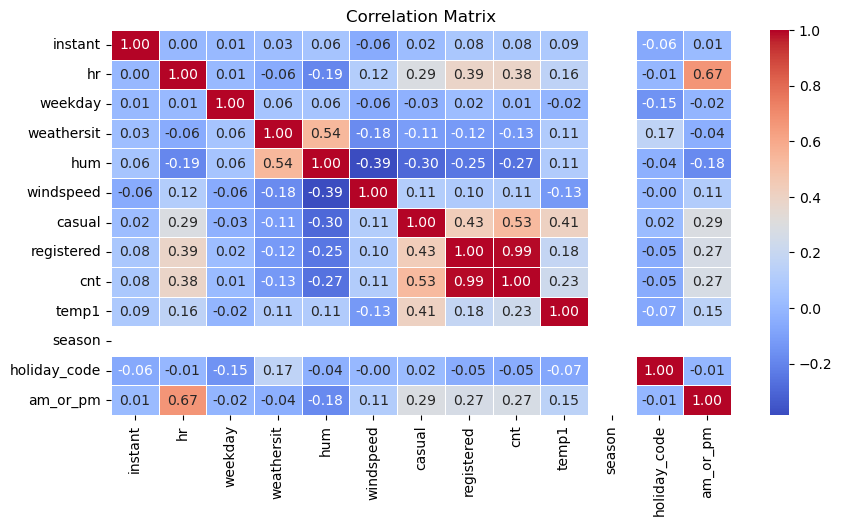

In [145]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

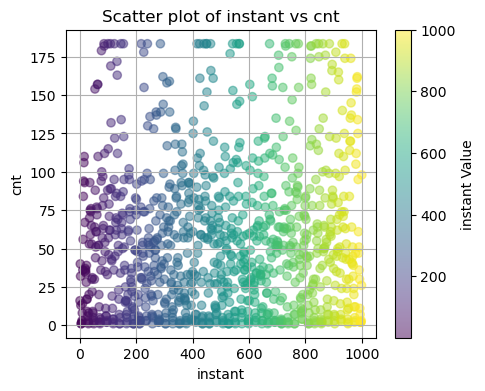

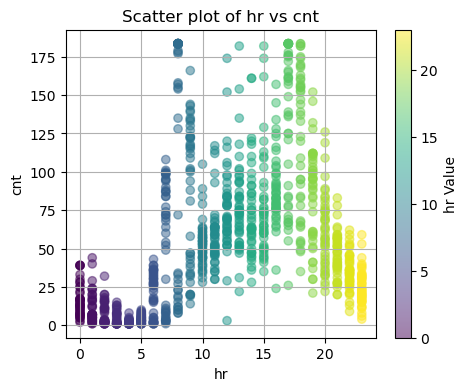

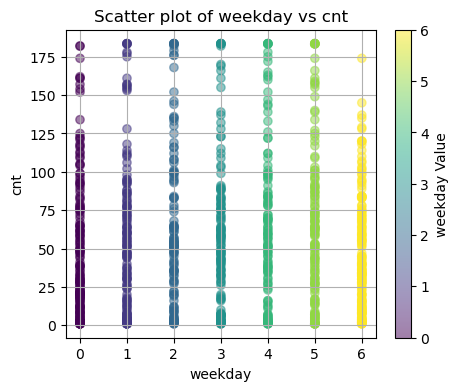

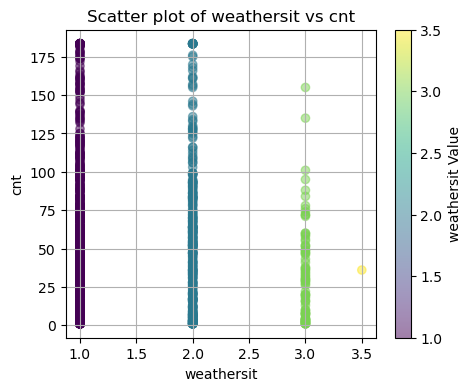

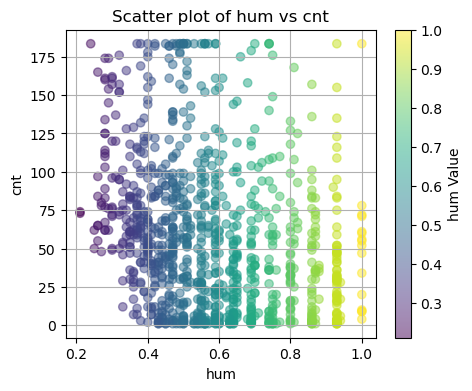

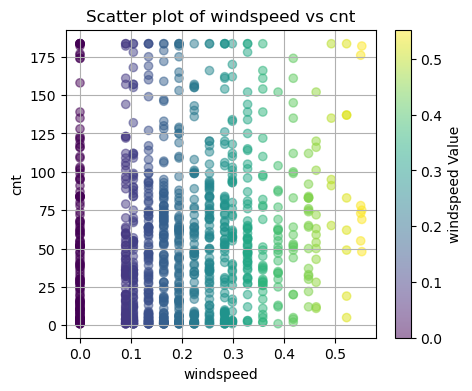

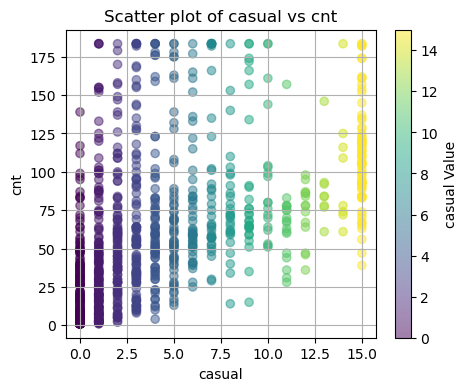

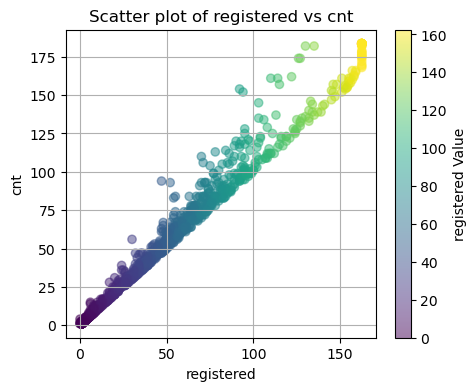

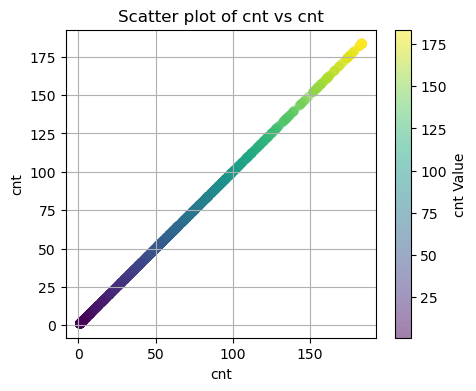

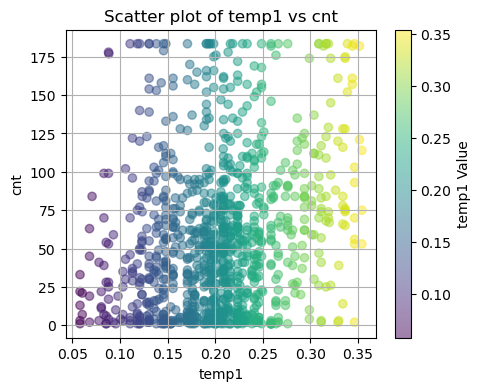

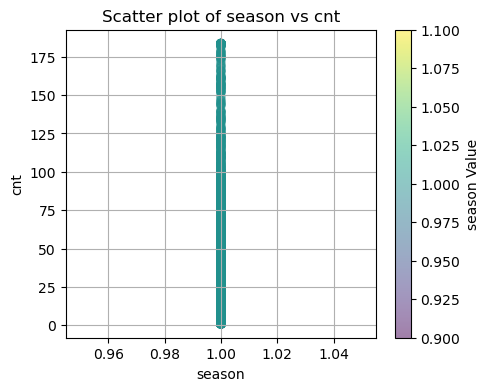

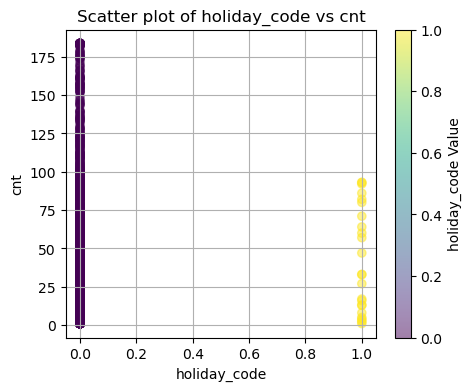

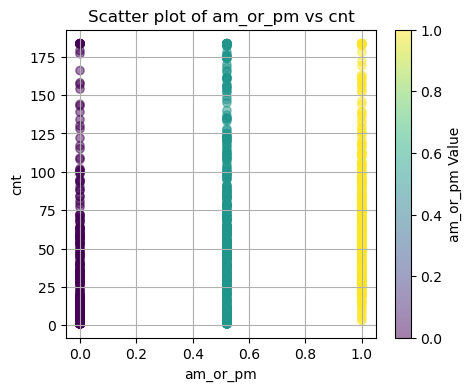

In [146]:
for feature in num_column:
     if feature!=['season','weekday','hr','mnth','temp','atemp','dteday','holiday_code']:
        plt.figure(figsize=(5, 4))
        scatter = plt.scatter(df_final[feature], df_final['cnt'], alpha=0.5, c=df_final[feature], cmap='viridis')  
        plt.title(f'Scatter plot of {feature} vs cnt')
        plt.xlabel(feature)
        plt.ylabel('cnt')
        plt.colorbar(scatter, label=f'{feature} Value')  
        plt.grid(True)
        plt.show()

In [147]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [148]:
# Save the DataFrame as a CSV file
df_final.to_csv('df_final.csv', index=False)


In [149]:
# Verify the file is saved
print("Data saved as 'df_final.csv'")

Data saved as 'df_final.csv'
